# 1. Introducción
En este notebook se realizará un análisis del dataset de diabetes ofrecido por sklearn, este conjunto de datos estudia diversas características físicas y bioquímicas sobre pacientes que padecen diabetes. Además, en base a estas características se entrenará un modelo cuyo objetivo será predecir la variable objetivo.

El presente trabajo estará dividido en los siguientes pasos:

* Ingesta: se procederá a la descarga de los datos y a su posterior transformación en una estructura de tipo Dataframe de la librería Pandas.
* Análisis Exploratorio de Datos: se observarán diversos aspectos sobre la estructura, distribución y correlación de las variables del dataset.
* Análisis Exploratorio de Datos Automático: mediante las librerías Sweetviz y Autoviz se obtendrá un recurso gráfico interactivo que muestre las características del conjunto de datos y sirva a modo de resumen del punto anterior.
* Entrenamiento y Validación del Modelo: en este punto se aplicarán diferentes algoritmos de predicción y se evaluará el rendimiento de los mismos.

El desarrollo de los anteriores puntos estará apoyado por un módulo que reúne una serie de métodos para el estudio de diversos aspectos de un conjunto de datos.



In [ ]:
# Se importa el módulo con todas las funciones auxiliares
from EDAModule import ExploratoryDataAnalysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# 2. Ingesta

El primer paso de este trabajo será realizar la ingesta del dataset diabetes, para ello se descargará a través del método load_diabetes y mediante la librería Pandas se cargará toda su información en una estructura de tipo dataframe.

Los datos de este conjunto se descargan por defecto centrados y escalados en base a la desviación estándar, lo que implicaría que el valor medio original de cada variable se mostrase como el valor 0 en el presente dataset. Con el objetivo de mejorar la claridad del estudio, el dataset se descargará con la opción scaled=False, lo cual permite obtener los datos originales sin sufrir escalado.

Para comenzar a trabajar con el módulo importado lo primero que se debe hacer es inicializarlo con el dataframe que se ha creado, a continuación se almacenará su diccionario de información y finalmente se consultará para observar su contenido.

Este diccionario de información almacena algunas características del dataset como dimensiones, contexto de sus variables e información sobre el origen del mismo.


In [ ]:
from sklearn.datasets import load_diabetes
import pandas as pd

# Se descarga el conjunto de datos
diabetes = load_diabetes(scaled=False)

# Se construye un dataframe a partir del dataset descargado
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
data['target'] = diabetes.target

# Se inicializa el módulo mediante el dataframe
eda = ExploratoryDataAnalysis(dataset=data)

# Se establece el valor de la propiedad descripción del dataset en el módulo y se muestra
eda.setDescription(diabetes.DESCR)
print("Dataset description: ", eda.getDescription())

Dataset description:  .. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level


# 3. Análisis Exploratorio de Datos

El análisis exploratorio de datos tiene como objetivo obtener un mayor conocimiento sobre el dataset con el que se va a trabajar, con este propósito se estudiarán los siguientes puntos:

* Dimensiones
* Variables
* Tipos
* Estadísticas
* Valores nulos
* Outliers
* Valores únicos
* Histogramas
* Matriz de correlación
* Gráficos de dispersión

**Dimensiones:**

En primer lugar se observarán las dimensiones y el tamaño del conjunto de datos. En este caso se trata de un dataset con 11 variables y 442 casos de estudio, lo cual da como resultado un total de 4862 datos.

Además se expondrá una muestra de las 5 primeras filas del conjunto de datos.

In [ ]:
# Se ejecuta la función getShape para obtener las dimensiones del dataframe
print("1. Shape: ", eda.getShape())

# Se ejecuta la función getSize para obtener el tamaño del dataframe
print("\n2. Size:", eda.getSize())

# Se ejecuta la función getHead para obtener una muestra del dataframe
print("\n3. Structure:")
eda.getHead()

1. Shape:  (442, 11)

2. Size: 4862

3. Structure:


age  sex   bmi     bp     s1     s2    s3   s4      s5    s6  target
0  59.0  2.0  32.1  101.0  157.0   93.2  38.0  4.0  4.8598  87.0   151.0
1  48.0  1.0  21.6   87.0  183.0  103.2  70.0  3.0  3.8918  69.0    75.0
2  72.0  2.0  30.5   93.0  156.0   93.6  41.0  4.0  4.6728  85.0   141.0
3  24.0  1.0  25.3   84.0  198.0  131.4  40.0  5.0  4.8903  89.0   206.0
4  50.0  1.0  23.0  101.0  192.0  125.4  52.0  4.0  4.2905  80.0   135.0

**Variables:**

El siguiente paso será explicar el significado de cada una de las variables que integran el dataset:

* age: edad en años.

* sex: género.

* bmi: índice de masa corporal.

* bp: presión arterial media.

* s1: colesterol sérico total.

* s2: lipoproteínas de baja densidad.

* s3: lipoproteínas de alta densidad.

* s4: colesterol total / HDL.

* s5: posible logaritmo del nivel de triglicéridos séricos

* s6: nivel de azúcar en sangre.

* target: medida cuantitativa de la progresión de la enfermedad un año después de la línea de base.

In [ ]:
# Se ejecuta la función getColumns para obtener el listado de columnas del dataframe
print("4. Columns:", eda.getColumns())

4. Columns: Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')


**Tipos:**

Una vez exlicadas las distintas variables se señalarña el tipo de datos que contienen.

En este caso únicamente se encuentran columnas numéricas, concretamente de tipo float64.

In [ ]:
# Se ejecuta la función getTypes para obtener el tipo de cada variable del dataframe
print("5. Data Types:")
eda.getTypes()

5. Data Types:


age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object

**Estadísticas:**

En este punto se evindenciarán una serie de estadísticas generales para cada una de las variables, en concreto las siguientes características:

* count: número de valores no nulos
* mean: media de los valores
* std: desviación estándar
* min: valor mínimo
* 25%: percentil 25
* 50%: percentil 50
* 75%: percentil 75
* max: valor máximo

Debido a que se trata de variables biológicas la gran mayoría de datos se encuentran en valores asumibles en un orden lógico, es decir, no se aprecian valores extremos de máximos ni mínimos, al igual que las desviaciones estándar no presentan grandes oscilaciones. Si se presentasen valores muy alejados de las medias cabría alarmarse sobre el estado de salud de los pacientes de las muestras.

In [ ]:
# Se ejecuta la función getStatistics para obtener datos estadísticas de todas las columnas del dataframe
print("6. Summary Statistics for Numerical Columns:")
eda.getStatistics()

6. Summary Statistics for Numerical Columns:


age         sex         bmi          bp          s1          s2  \
count  442.000000  442.000000  442.000000  442.000000  442.000000  442.000000   
mean    48.518100    1.468326   26.375792   94.647014  189.140271  115.439140   
std     13.109028    0.499561    4.418122   13.831283   34.608052   30.413081   
min     19.000000    1.000000   18.000000   62.000000   97.000000   41.600000   
25%     38.250000    1.000000   23.200000   84.000000  164.250000   96.050000   
50%     50.000000    1.000000   25.700000   93.000000  186.000000  113.000000   
75%     59.000000    2.000000   29.275000  105.000000  209.750000  134.500000   
max     79.000000    2.000000   42.200000  133.000000  301.000000  242.400000   

               s3          s4          s5          s6      target  
count  442.000000  442.000000  442.000000  442.000000  442.000000  
mean    49.788462    4.070249    4.641411   91.260181  152.133484  
std     12.934202    1.290450    0.522391   11.496335   77.093005  
min     22.000000    2.000000    3.258100   58.000000   25.000000  
25%     40.250000    3.000000    4.276700   83.250000   87.000000  
50%     48.000000    4.000000    4.620050   91.000000  140.500000  
75%     57.750000    5.000000    4.997200   98.000000  211.500000  
max     99.000000    9.090000    6.107000  124.000000  346.000000

**Nulos:**

A continuación se indicará el número de valores nulos que presenta cada variable.

Como se puede contemplar este dataset no presenta valores nulos en ninguna de sus columnas.


In [ ]:
# Se ejecuta la función getNulls para obtener el número de valores nulos de cada columna del dataframe
print("\n7. Checking for Missing Values:")
eda.getNulls()


7. Checking for Missing Values:


age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

**Outliers**

Los outliers son valores extremos de una variable numérica del dataset, normalmente se encuentran alejados del percentil 25 y del percentil 75, por tanto al visualizar las columnas medianta gráficas boxplot se podrán localizar en los extremos de la imagen. Para advertir la presencia de outliers se generará una gráfica boxplot de cada variable.

A la vista de todas las gráficas, se puede afirmar que no se encuentra evidencia de la presencia de outliers en ninguna variable, este argumento cuadra con la tabla estadística previa en la cual era apreciable que los valores máximos no se alejaban de manera extrema de los valores medios.


8. Boxplot visualization


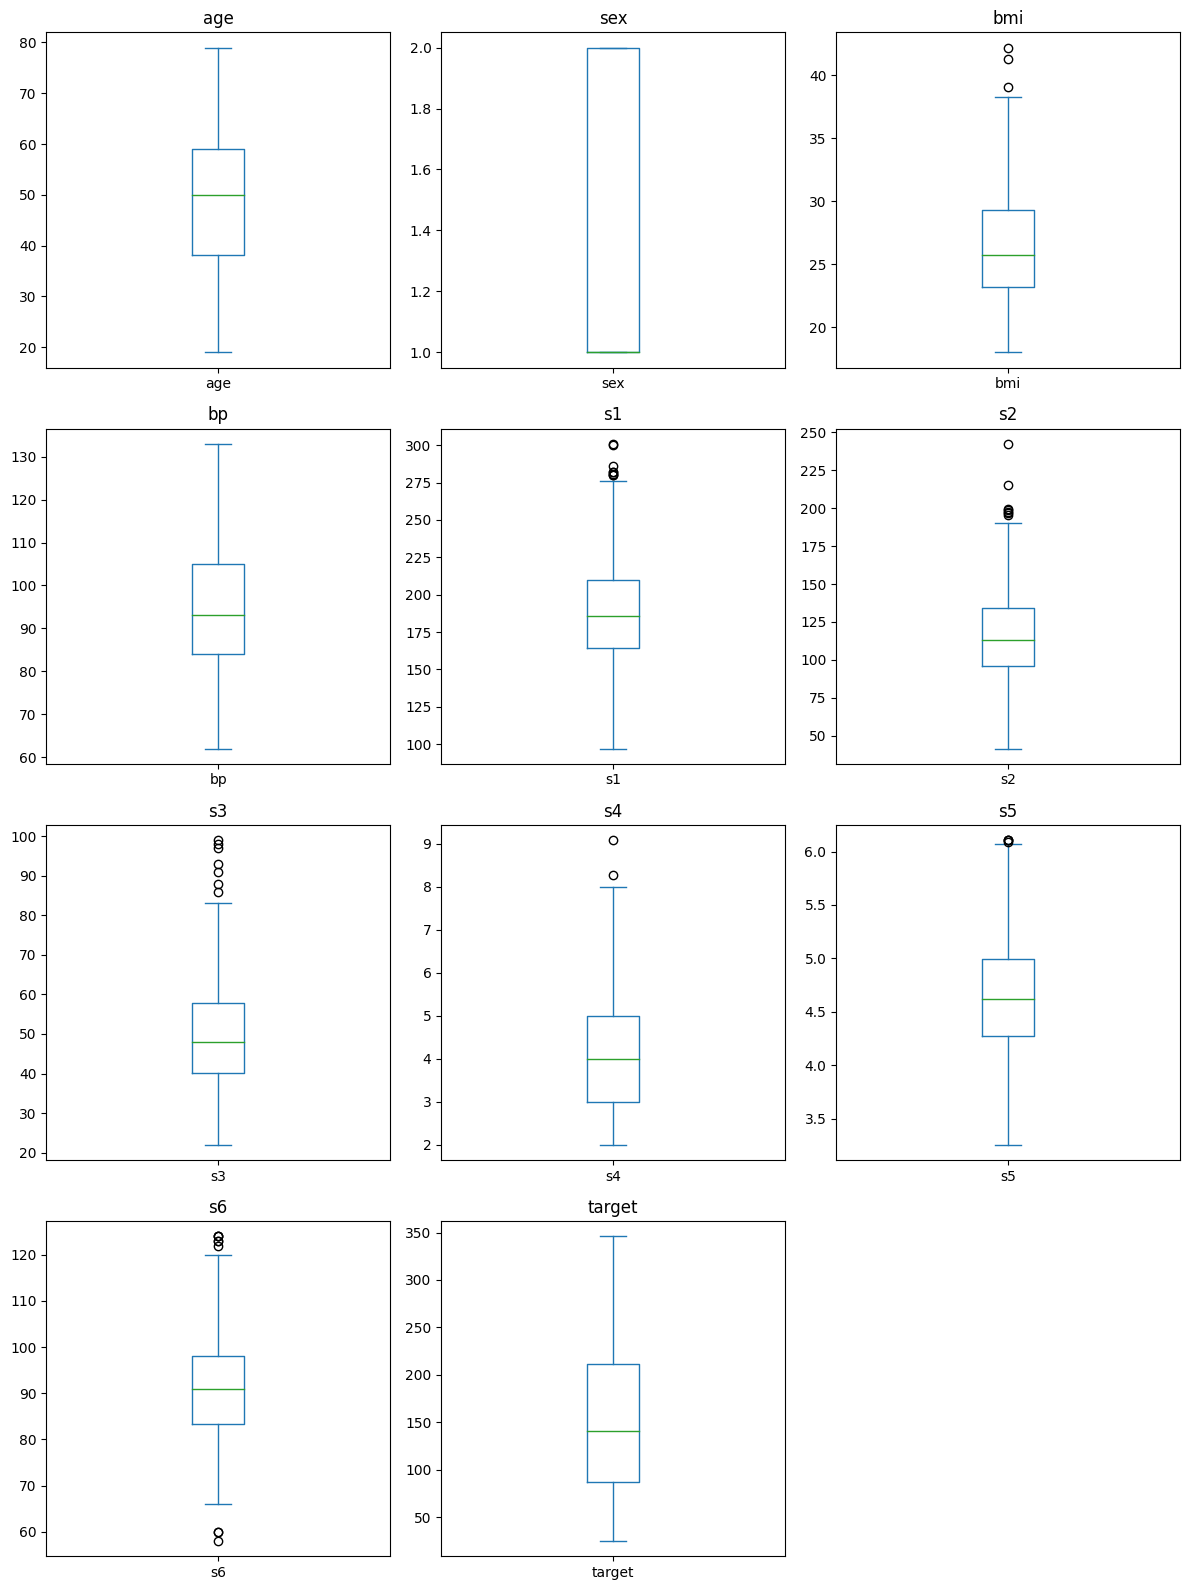

In [ ]:
# Se ejecuta la función getBoxplots para mostrar un gráfico boxplot de cada variable del dataframe
print("\n8. Boxplot visualization")
eda.getBoxplots()

**Únicos**

Los valores únicos son todos los posibles valores distintos que aparecen en una variable. En el caso de las numéricas, debido a la cantidad de posibles valores que suelen tener, excepto si son variables binarias, no resulta tan interesante como en el de las categóricas, que permiten observar las distintas categorías de la columna, por lo que para este dataset no se extraerá mucha información de este punto.
En este apartado se hallará en primer lugar el número de valores distintos que presenta cada columna y en segundo lugar el número de apariciones de cada valor.

Tal como se puede analizar en la lista de valores únicos no presentan grandes cantidades de distintos valores, esto tiene sentido ya que al tratarse de variables biológicas deben encontrarse dentro de los rangos fisiológicos viables para la vida.

In [ ]:
# Se ejecuta la función getUniques para mostrar los valores únicos de cada variable del dataframe
print("9. List of Unique Values:")
print(eda.getUniques())

# Se ejecuta la función countUniques para mostrar el número de valores únicos de cada variable del dataframe
print("\n10. Count of Unique Values:", eda.countUniques())

9. List of Unique Values:
age        58
sex         2
bmi       163
bp        100
s1        141
s2        302
s3         63
s4         66
s5        184
s6         56
target    214
dtype: int64

10. Count of Unique Values: 
Columna: age
53.0    19
60.0    17
51.0    16
41.0    15
48.0    14
34.0    14
61.0    14
52.0    14
67.0    13
50.0    13
47.0    12
57.0    12
49.0    12
55.0    12
62.0    11
54.0    11
37.0    11
46.0    11
42.0    10
59.0    10
58.0     9
36.0     9
56.0     9
28.0     8
68.0     7
44.0     7
43.0     7
65.0     7
32.0     7
35.0     7
38.0     6
29.0     6
66.0     6
33.0     6
69.0     6
39.0     6
40.0     5
64.0     5
71.0     5
25.0     5
31.0     4
22.0     4
63.0     4
45.0     4
23.0     4
27.0     4
24.0     3
20.0     3
19.0     3
30.0     3
21.0     2
26.0     2
79.0     2
75.0     2
72.0     1
74.0     1
70.0     1
73.0     1
Name: age, dtype: int64

Columna: sex
1.0    235
2.0    207
Name: sex, dtype: int64

Columna: bmi
24.1    8
23.5    8
25.6    

**Histogramas:**

Los histogramas permiten observar el peso, es decir, el número de apariciones, que toma cada rango de valores dentro del conjunto, para ello representa a cada rango mediante una columna.

Inicialmente se generarán histogramas con 10 bins para todas las variables y a la vista de la distribución de los valores en las distintas gráficas se pueden extraer una serie de conclusiones:

* age: la edad más repetida está en entre 50 y 60 años, y desde ese rango los valores se alejan hacia 20 años y hacia 80 años, la reducción hacia los extremos puede explicarse a que los menores de 50 años normalmente tienen un ritmo de vida más activo y que los mayores de 60 fallecen progresivamente.

* sex: se trata de una columna binaria con dos valores, uno para masculino y otro para femenino, se puede apreciar un ligero equilibrio entre sendos valores, por lo que tendremos un número de muestras no muy distinto entre ambos géneros.

* bmi, s1, s2, s3, s5 y s6: todas muestran un máximo numero de aparaciones en valores intermedio hacia el que convergen rápidamente los valores bajos y que se va suavizando hacia los valores altos.

* s4: resalta la repentina reducción de apariciones en los rangos 4-5 y 6-7.

* target: destaca que presente un máximo número de apariciones justo por debajo del valor 100, que progresa descendentemente hacia los valores altos, excepto por otro aument de apariciones entorno al valor 250.


11. Histogram visualization with 10 bins


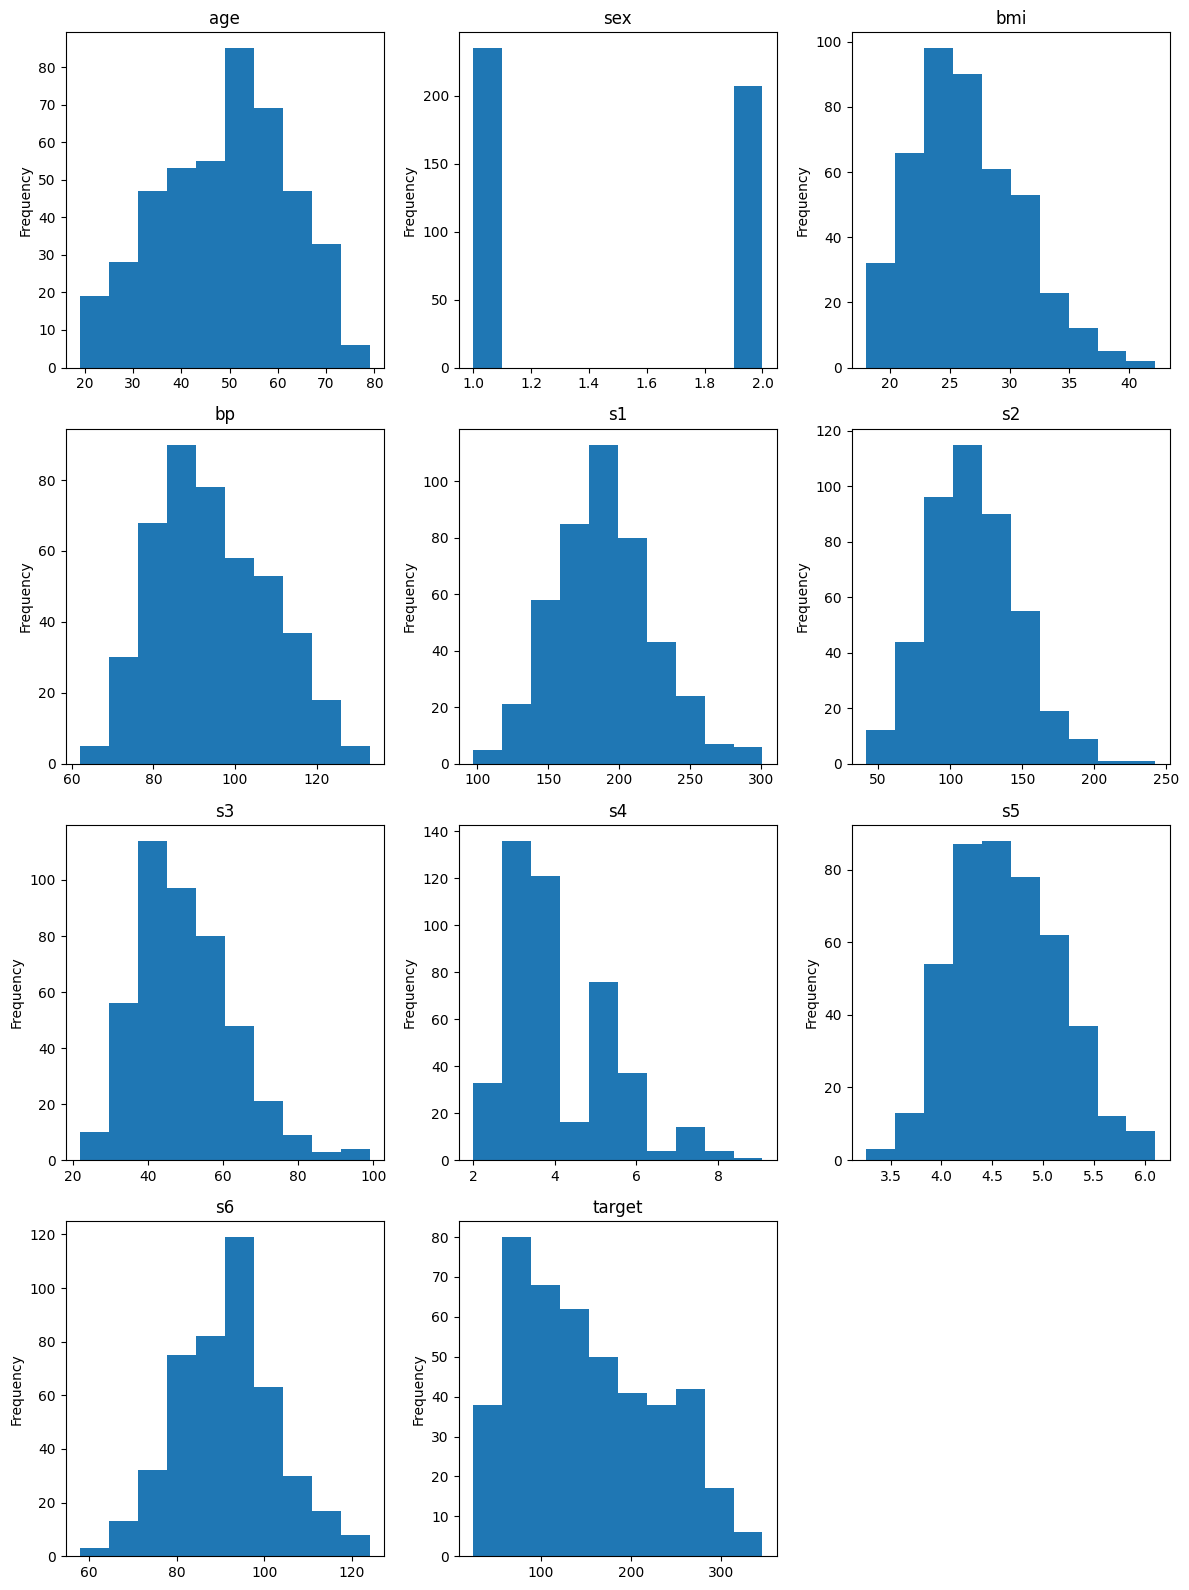

In [ ]:
# Se ejecuta la función getHistograms para mostrar un histograma de 10 bins para cada variable del dataframe
print("\n11. Histogram visualization with 10 bins")
eda.getHistograms()

**Matriz de correlación**

La matriz de correlación permite observar el grado de relación que se da entre las distintas variables, es decir, como de influyente resulta el valor de una para otra. Mediante la tabla generada, será posible ver qué variables pueden resultar más importantes a la hora de predecir otras.

Aunque en general la mayoría de variables no tienen mucha relación entre sí, se pueden encontrar algunos pares de variables con indicios de relación, a continuación se explorarán todos aquellos que han obtenido una puntuación superior a 0.5:

* s1 y s2: ambas variables están relacionadas con el colesterol sérico, es lógico que exista una alta correlación entre el nivel total de lípidos séricos (s1) y el nivel de lipoproteínas de baja densidad (s2).
* s2 y s4: la lipoproteína de baja densidad (s2) y el colesterol total / HDL (s4) están relacionados con el perfil lipídico.
* s4 y s5: ambas variables están relacionadas con medidas del perfil lipídico. Es probable que exista una correlación entre el colesterol total / HDL (s4) y el posible logaritmo del nivel de triglicéridos séricos (s5).
* bmi y target: el índice de masa corporal (bmi) y la medida cuantitativa de la progresión de la enfermedad (target) pueden tener una relación, ya que el peso y la salud metabólica están interrelacionados.
* s5 y target: el posible logaritmo del nivel de triglicéridos séricos (s5) y la medida cuantitativa de la progresión de la enfermedad (target) pueden estar relacionados debido a la influencia de los triglicéridos en la salud metabólica.
* s1 y s4: ambas variables están relacionadas con el colesterol sérico. Es probable que exista una correlación entre el nivel total de lípidos séricos (s1) y el colesterol total / HDL (s4).
* s1 y s5: las variables relacionadas con el colesterol sérico (s1) y el posible logaritmo del nivel de triglicéridos séricos (s5) pueden tener una relación debido a la influencia del colesterol en la salud metabólica.

12. Correlation Matrix:


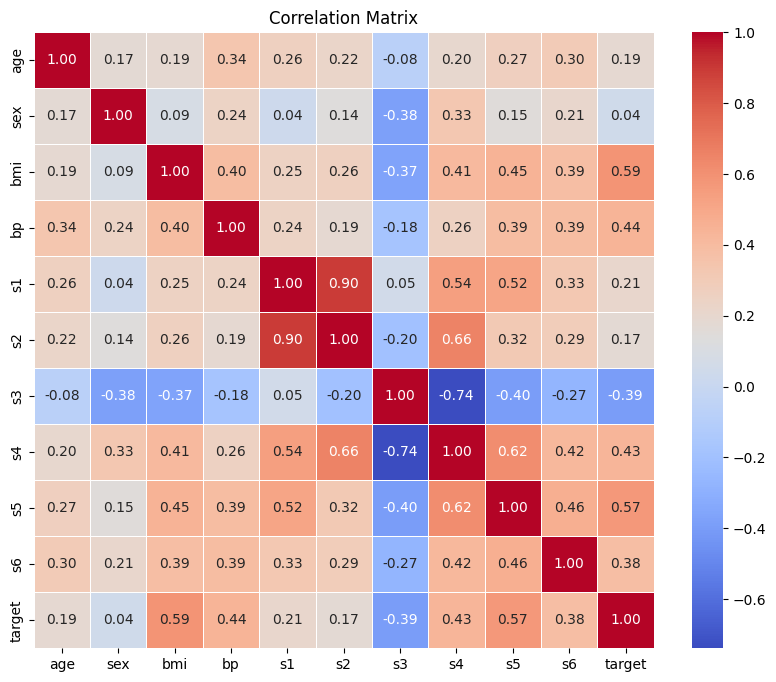

In [ ]:
# Se ejecuta la función getCorrelationMatrix para mostrar la matriz de correlación del dataframe
print("12. Correlation Matrix:")
eda.getCorrelationMatrix()

**Gráficos de dispersión:**

Los gráficos de dispersión nos permiten comparar la relación entre los valores de distintas variables. Concretamente se estudiará la relación entre los pares de variables con mayor grado de interrelación según la matriz de correlación

En cuanto a los pares de variables representados se puede afirmar:

* s1 y s2: muestran una linea muy clara de relación entre ambas variables, se puede avanzar como el aumento de valores de s1 implica un aumento proporcional en los valores de s2.
* s2 y s4, s4 y s5, s1 y s4: muestran relaciones discretas entre ambas variables de cada, en las que para que observación concreta de una variable hay una gran presencia de una observación concreta de la otra.
* bmi y target, s5 y target, s1 y s5: muestran una difusa nube de puntos que no permite apreciar una alta relación entre los pares, simplemente se puede observar como sendos pares aumentan de manera ligeramente proporcional.

13. Scatter Plot visualization


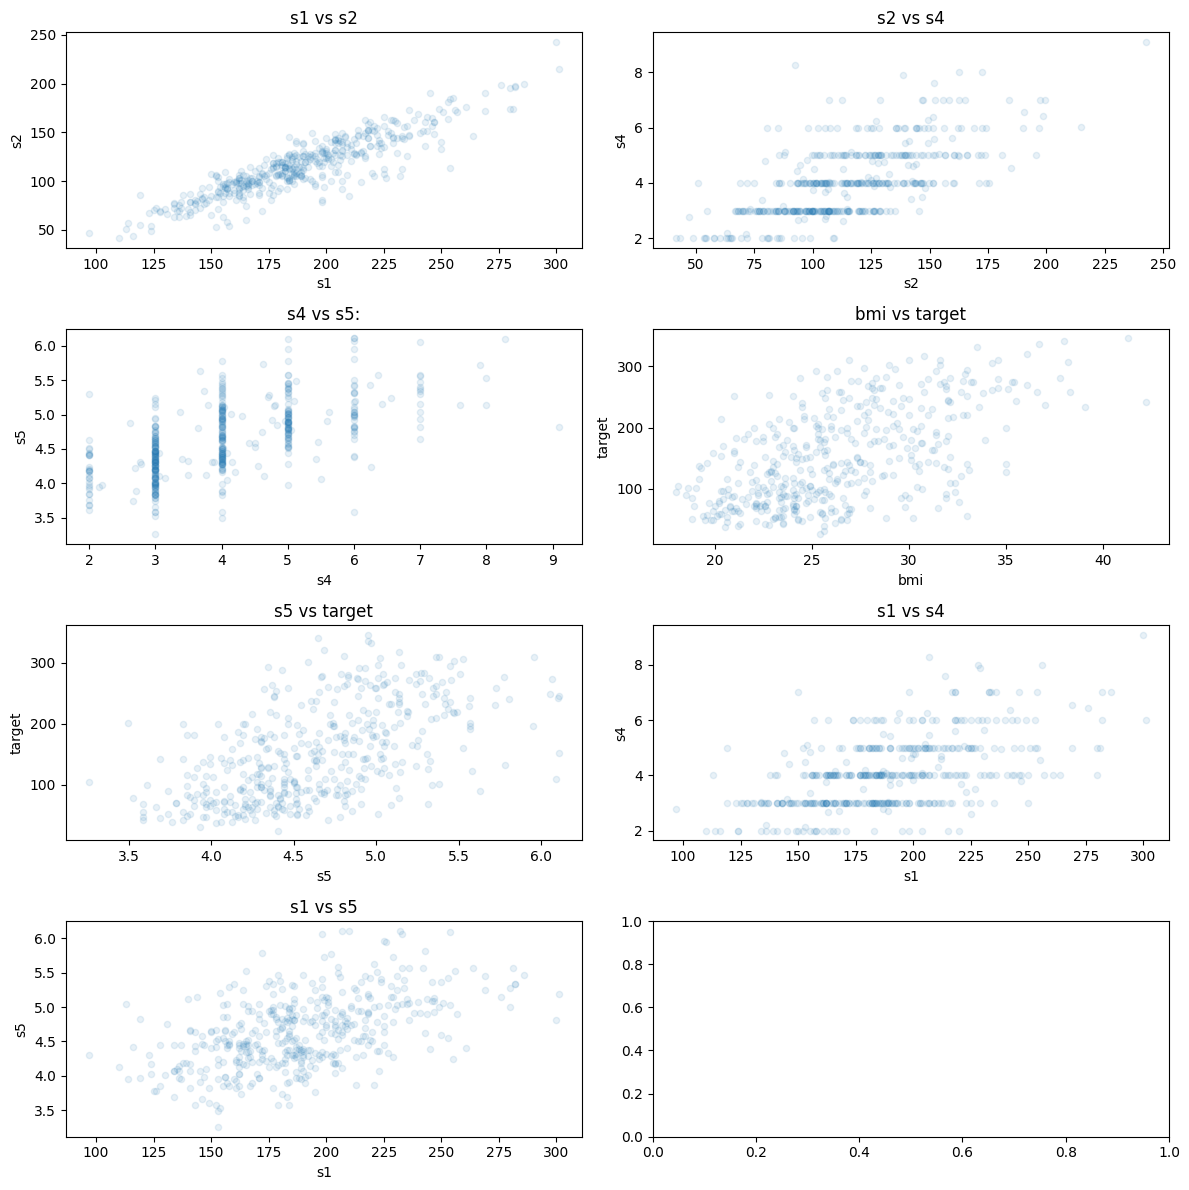

In [ ]:
# Se importa la librería matplotlib
import matplotlib.pyplot as plt

# Se genera una figura con espacio para 6 gráficos
print("13. Scatter Plot visualization")
fig, axs = plt.subplots(4, 2, figsize=(12, 12))

# Se inicializa cada subfigura para mostrar un gráfico de dispersión entre dos variables
data.plot.scatter(x='s1', y='s2', ax=axs[0, 0], alpha=0.1)
axs[0, 0].set_title('s1 vs s2')

data.plot.scatter(x='s2', y='s4', ax=axs[0, 1], alpha=0.1)
axs[0, 1].set_title('s2 vs s4')

data.plot.scatter(x='s4', y='s5', ax=axs[1, 0], alpha=0.1)
axs[1, 0].set_title('s4 vs s5:')

data.plot.scatter(x='bmi', y='target', ax=axs[1, 1], alpha=0.1)
axs[1, 1].set_title('bmi vs target')

data.plot.scatter(x='s5', y='target', ax=axs[2, 0], alpha=0.1)
axs[2, 0].set_title('s5 vs target')

data.plot.scatter(x='s1', y='s4', ax=axs[2, 1], alpha=0.1)
axs[2, 1].set_title('s1 vs s4')

data.plot.scatter(x='s1', y='s5', ax=axs[3, 0], alpha=0.1)
axs[3, 0].set_title('s1 vs s5')

# Se muestra la figura
plt.tight_layout()
plt.show()

Para finalizar se generará un último gráfico de dispersión que aglutine diversas características con el objetivo de obtener una vision global de su interrelación en el conjunto de datos.

Para la generación de este gráfico se ha optado por comparar la relación entre las variables s1 (colesterol sérico total) y s2 (colesterol LDL - "malo") en los ejes x e y respectivamente, además se está utilizando la variable s3 (colesterol HDL - "bueno") para la escala de color y la columna target (avance de la enfermedad) para el tamaño de los puntos.

El presente gráfico revela una serie de características que se enumeran a continuación:
* Respecto a la distribución entre ejes: un aumento de colesterol sérico total siempre implica un aumento gradual del colesterol malo.
* Respecto al uso de color: existe un patrón claro entre el colesterol malo y el bueno, este consiste en que prácticamente en todos los puntos del eje x, para un mismo nivel de colesterol sérico total, aquellos individuos con bajo nivel de colesterol malo presentan altos niveles de colesterol bueno, o lo que es lo mismo, la falta de ejercicio físico y mala dieta provocan una retención tanto de colesterol malo y una incapacidad de almacenar el colesterol bueno, por tanto se observa una relación inversamente proporcional entre estos parámetros.
* Respecto al tamaño de los puntos: se puede observar como, en base a la altura del eje y (colesterol malo) para un mismo punto del eje x, encontramos puntos de mayor tamaño en los extremos, mientras que aquellos intermedios presentan menor tamaño. Además se puede apreciar claramente como lo puntos más grandes tienen color morado y los más pequeños verde, es decir, los sujetos con peor avance de la enfermedad se corresponden con niveles bajos de colesterol bueno y los de mejor avance con los niveles altos.


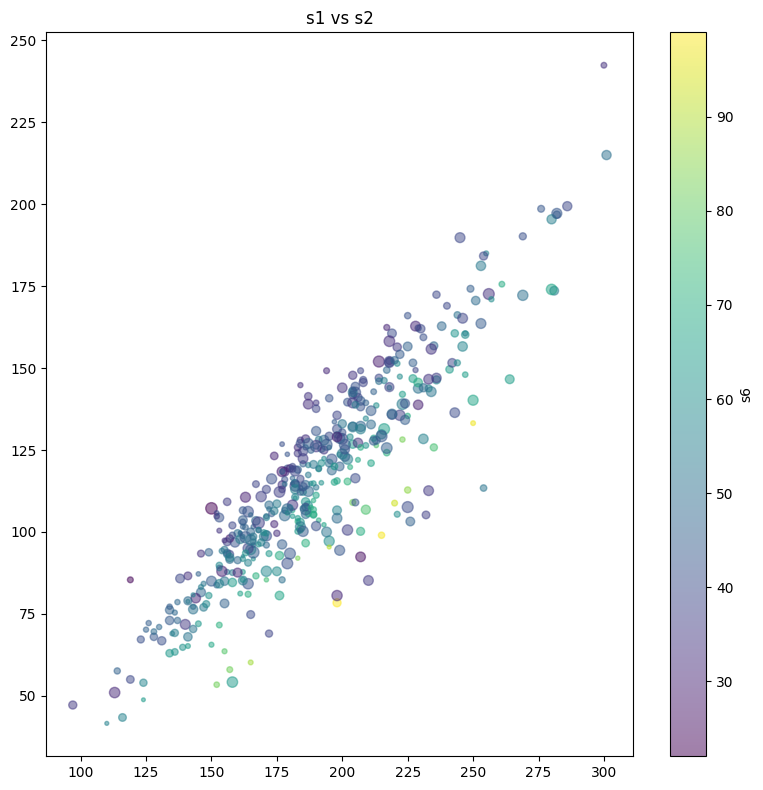

In [ ]:
# Se crea la figura y los ejes
fig, ax = plt.subplots(figsize=(8, 8))

# Se inicializa el gráfico de dispersión
scatter = ax.scatter(x='s1', y='s2', data=data, alpha=0.5, c='s3', cmap='viridis', s=data['target']*0.2)

# Se añade una barra de colores
cbar = plt.colorbar(scatter)
cbar.set_label('s6')

ax.set_title('s1 vs s2')

# Se muestra la figura
plt.tight_layout()
plt.show()

# 4. Análisis Exploratorio de Datos Automático

El Análisis Exploratorio de Datos Automático permite realizar un estudio de manera automátizada de todas las variables de un conjunto de datos. Se realizará primero un análisis centrado en obtener las estadísticas de los datos y un segundo cuyo objetivo es la representación de la información mediante distintos tipos de gráficos.

**EDA Automático Estadístico**

A continuación se ejecutará un eda automático centrado en extraer estadísticas, para ello se utiliza la librería sweetviz que permite obtener los siguientes datos de las columnas del dataset:

* ROWS: número de filas
* DUPLICATES: número de filas duplicadas
* FEATURES: número de columnas
* CATEGORICAL: número de columnas categóricas
* NUMERICAL: número de columnas numéricas
* VALUES MISSING: número de valores nulos
* DISTINCT: número de valores distintos
* MEDIAN: mediana
* AVG: media
* STD: desviación estándar
* VAR: varianza
* MIN: valor mínimo
* MAX: valor máximo
* 5%: percentil 5
* Q1: percentil 25
* Q3: percentil 75
* 95%: percentil 95
* RANGE: rango de valores
* IQR: rango intercuartílico
* SUM: sumatorio

Mediante pip se instalará la librería Sweetviz en el notebook y tras ello se ejecutará el análisis estadístico.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 43.9 MB/s eta 0:00:00


                                             |          | [  0%]   00:00 -> (? left)


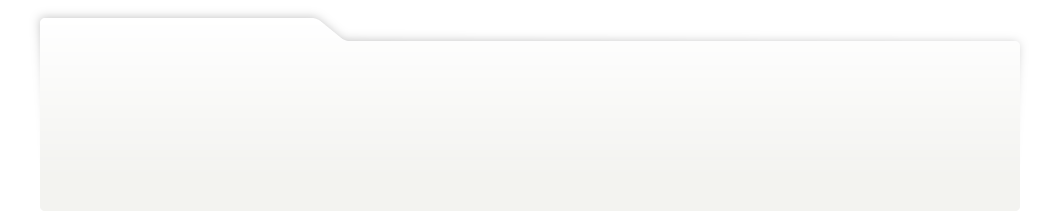
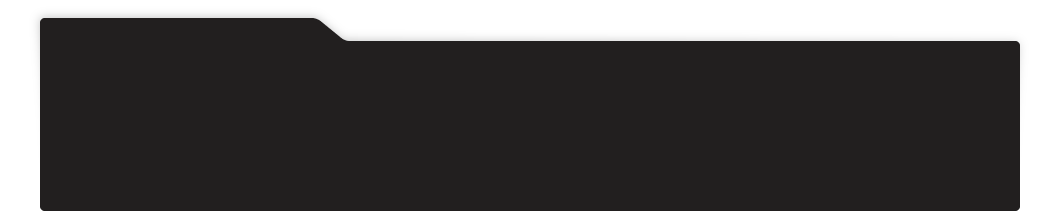
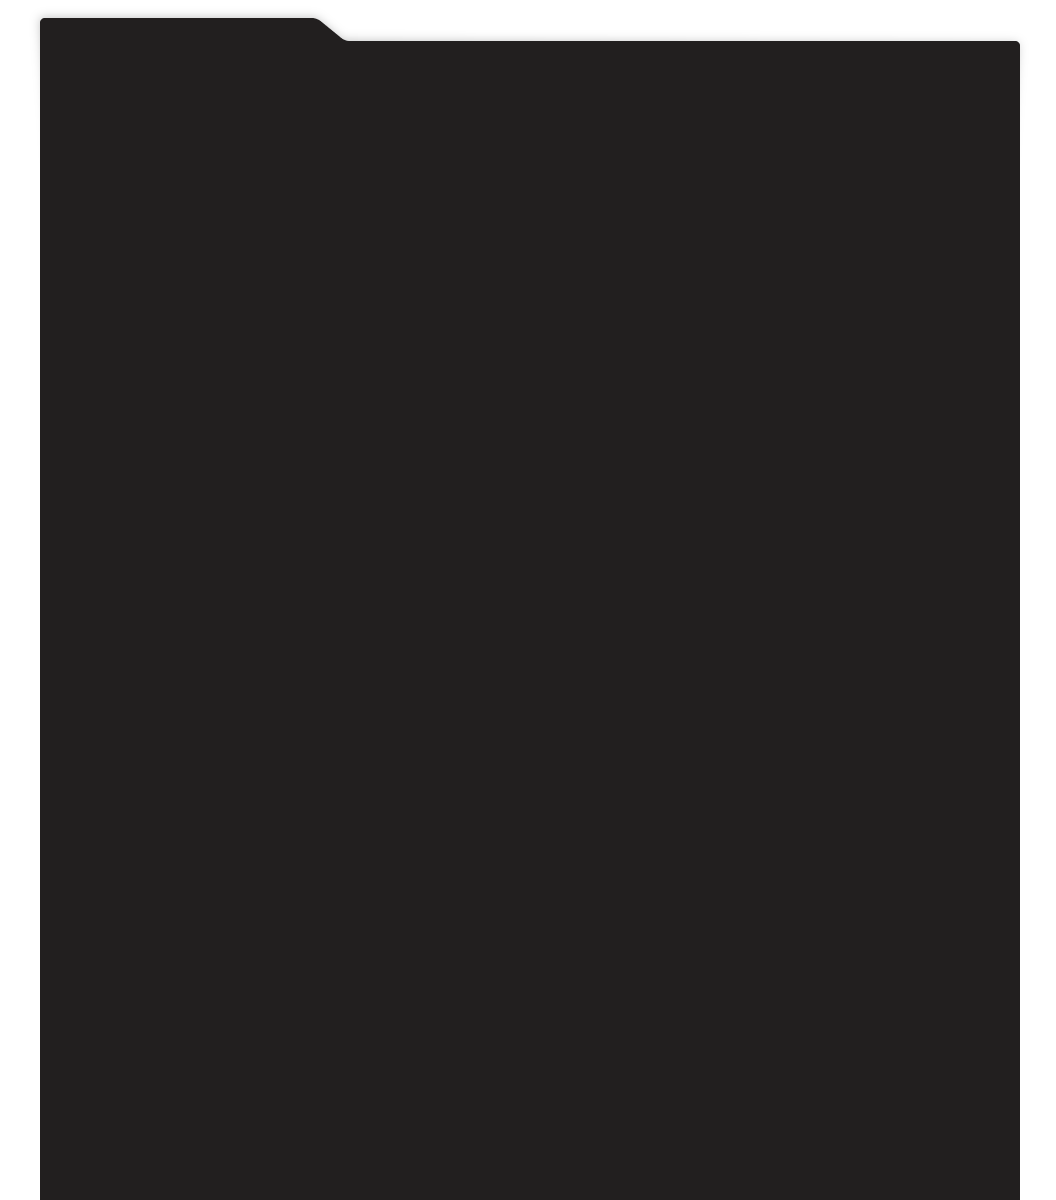
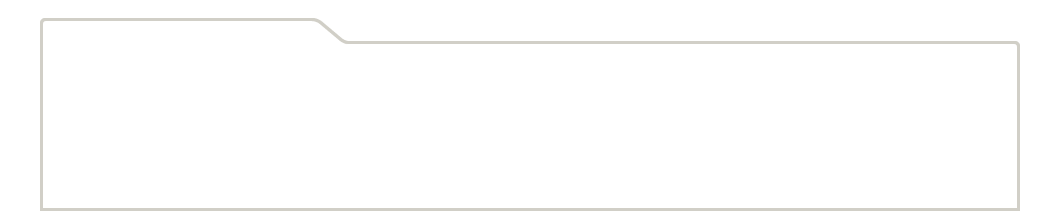
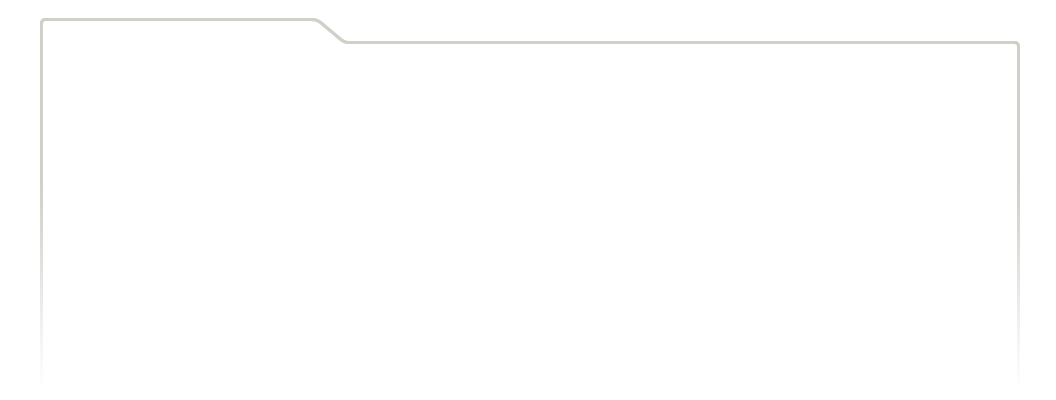
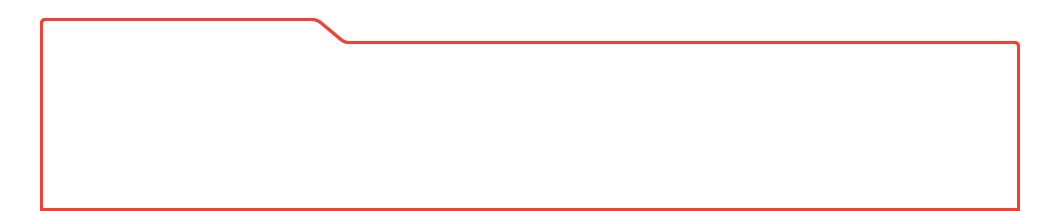
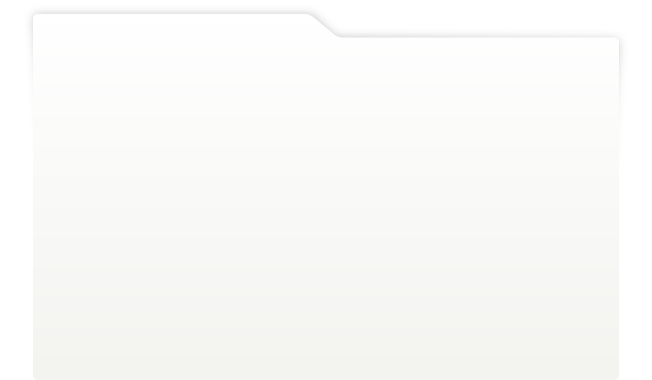
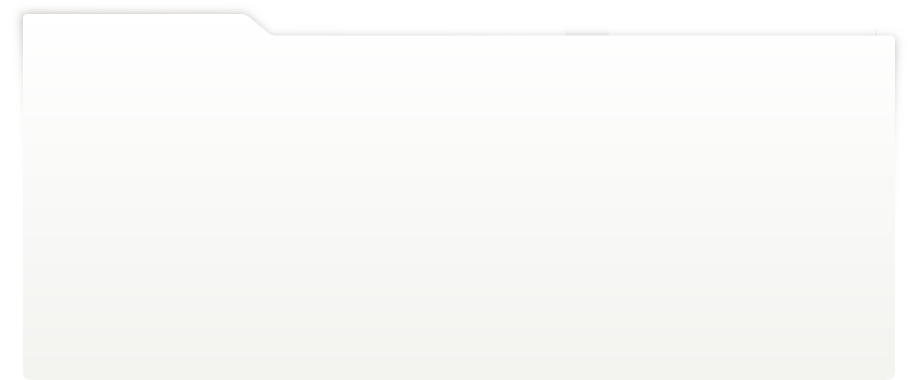
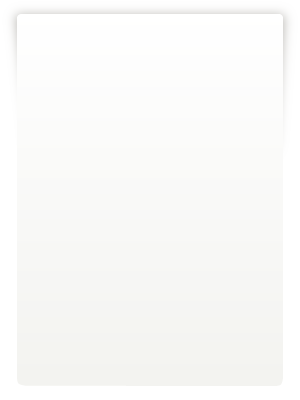
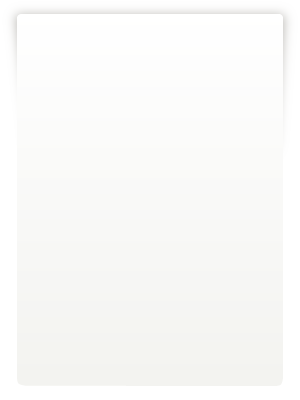
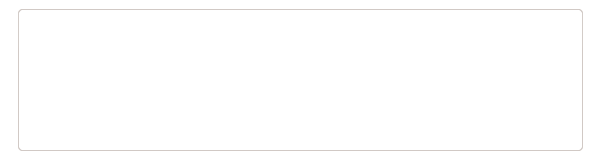
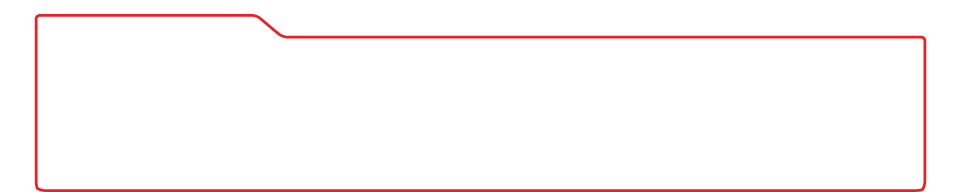
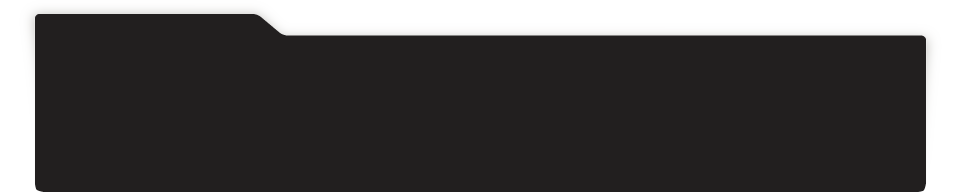
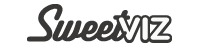
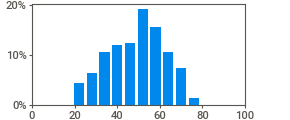
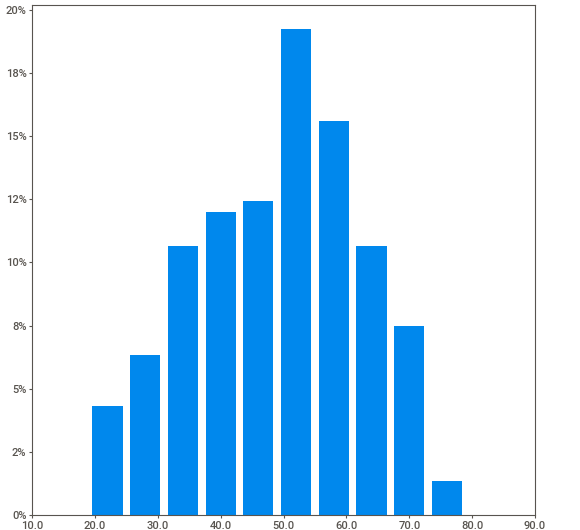
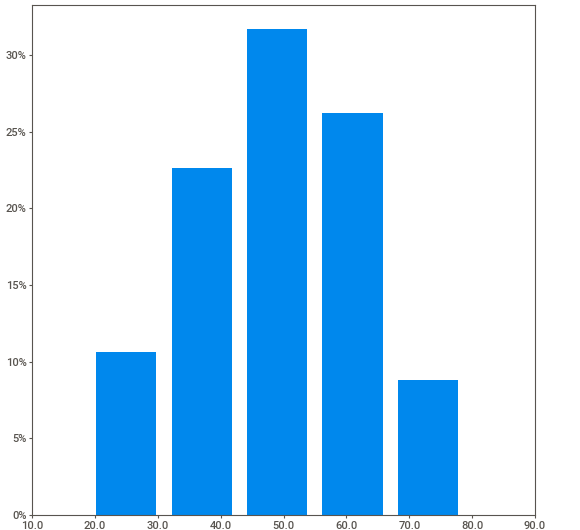
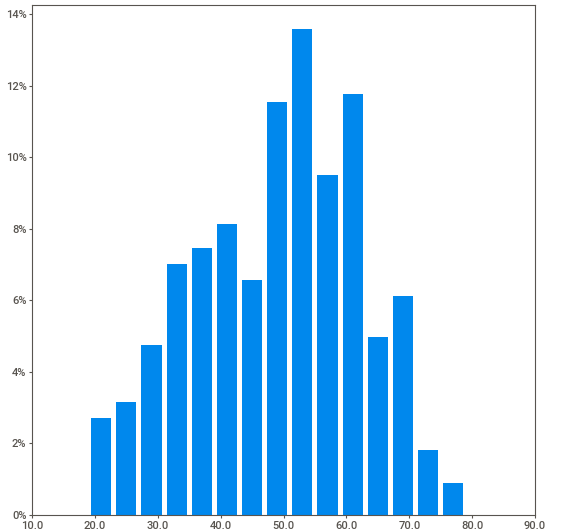
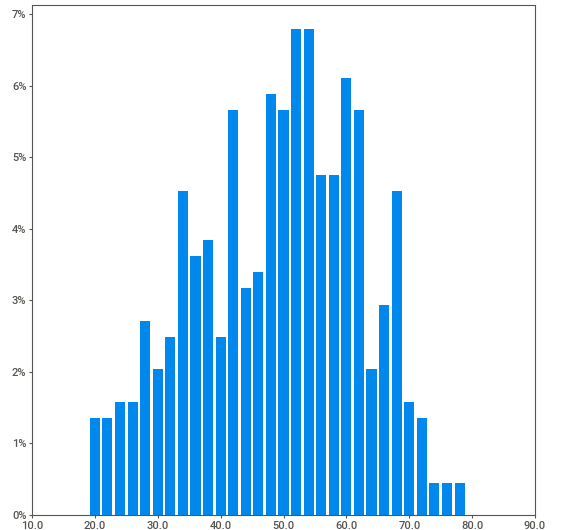
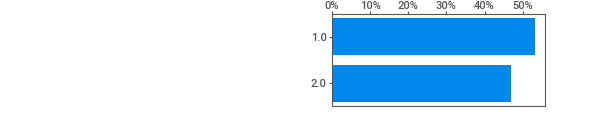
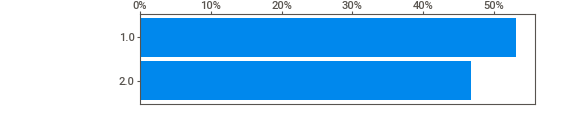
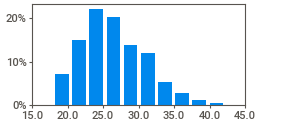
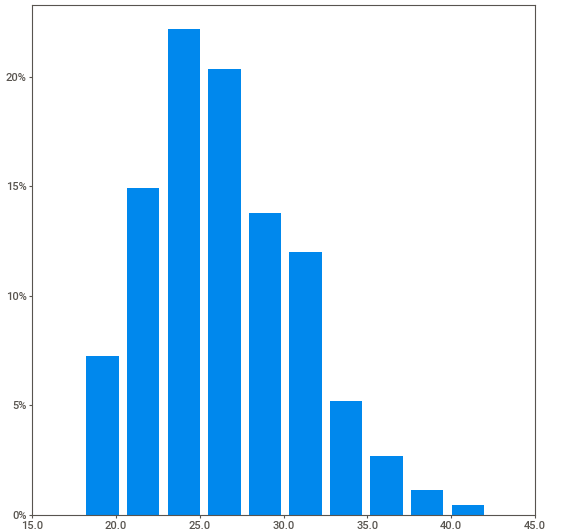
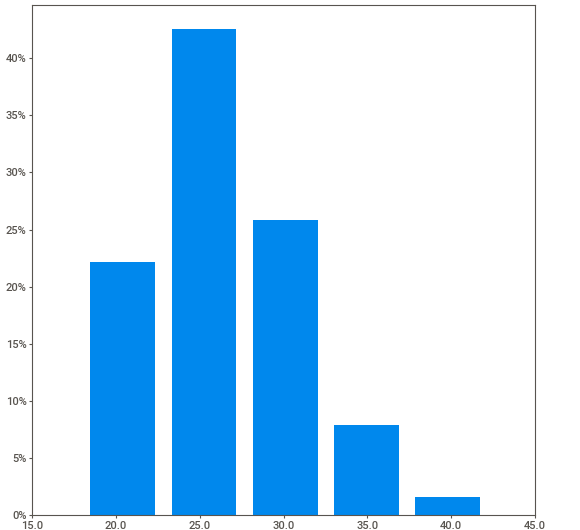
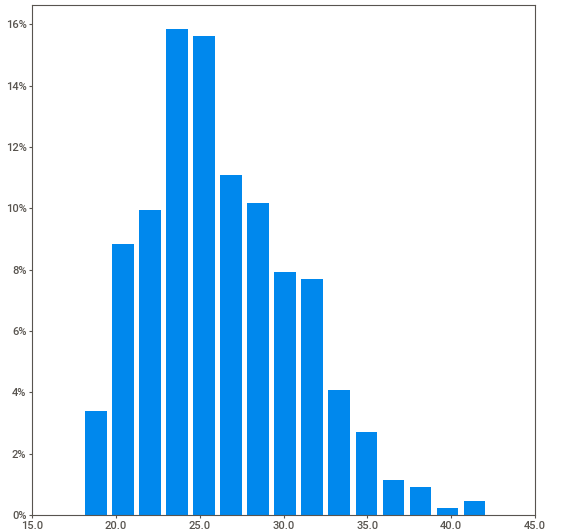
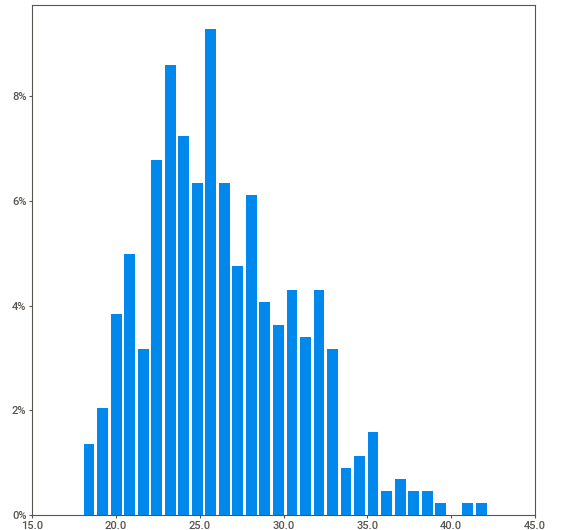
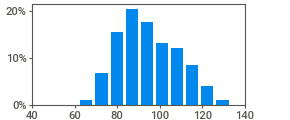
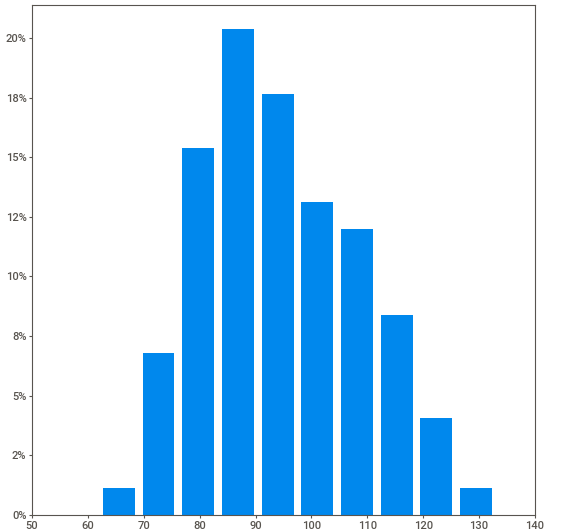
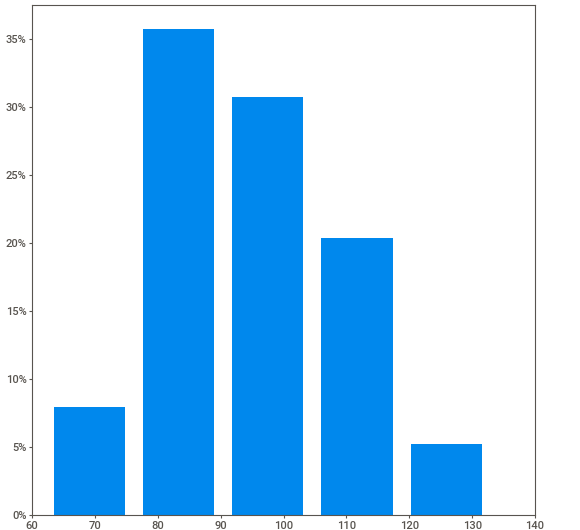
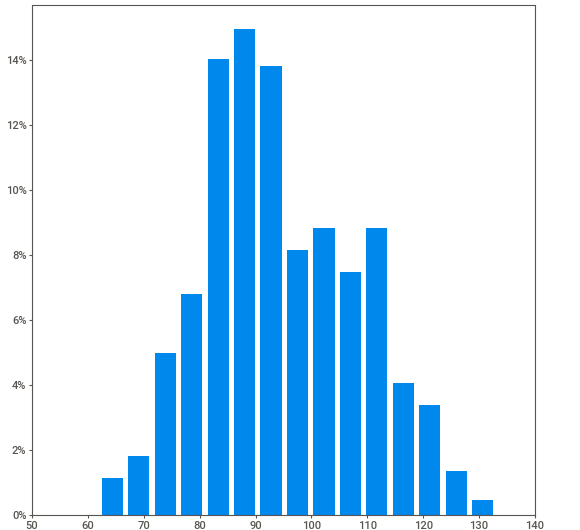
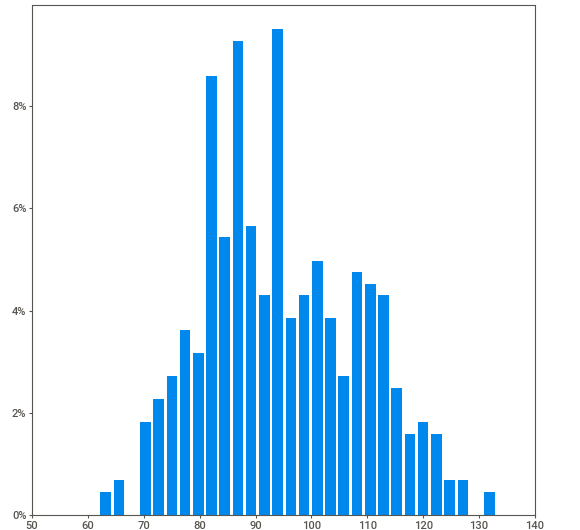
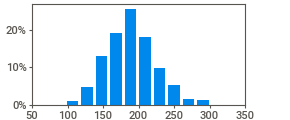
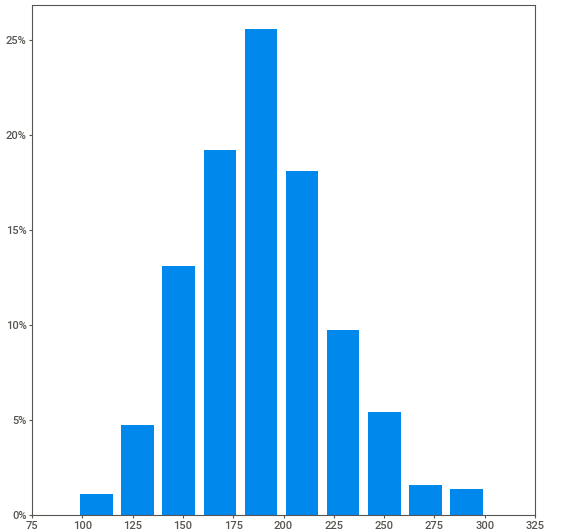
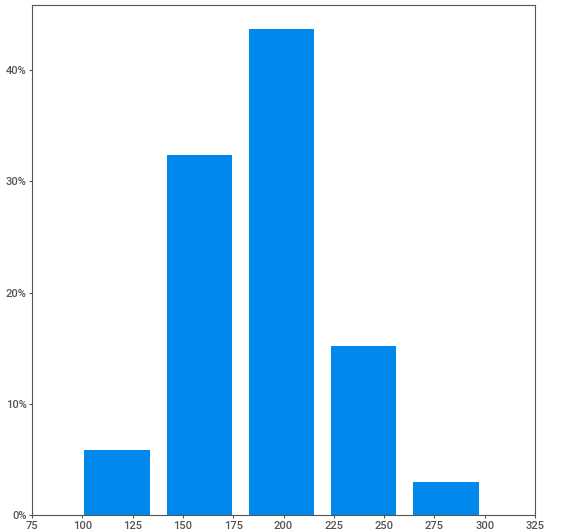
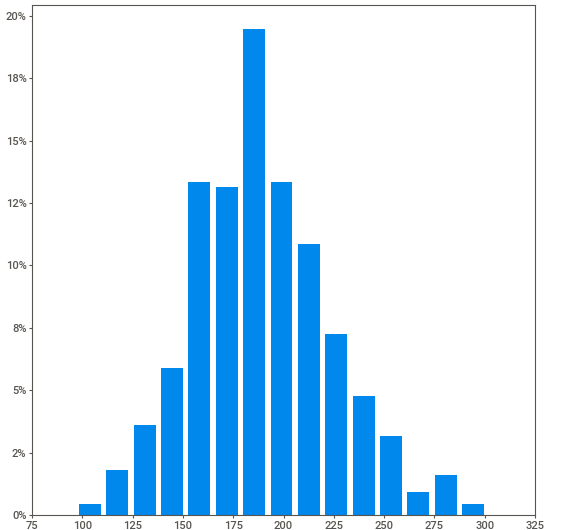
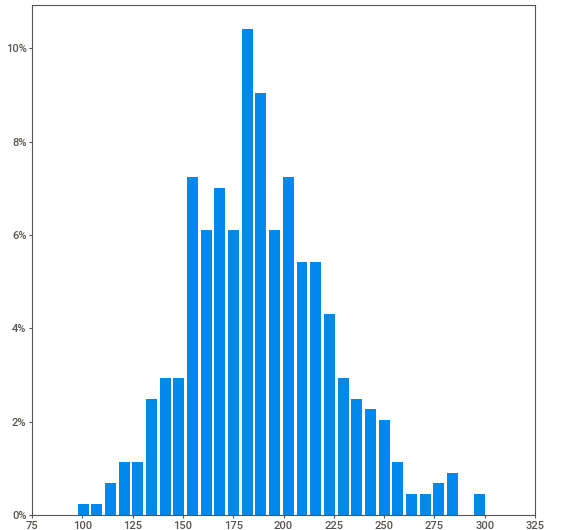
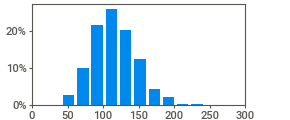
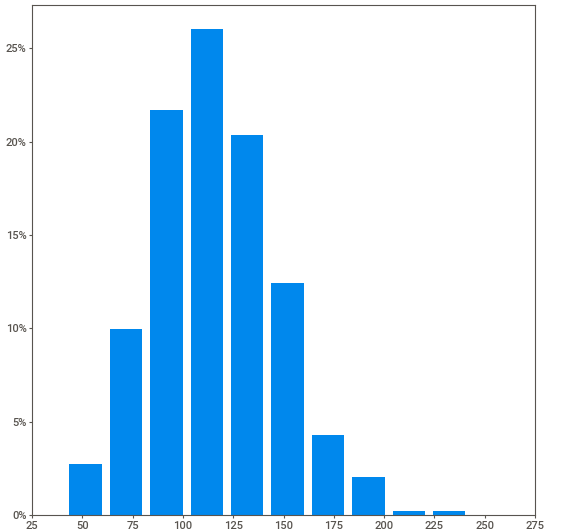
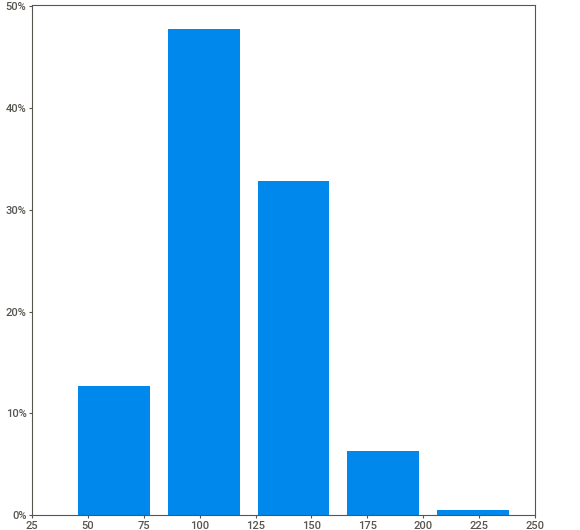
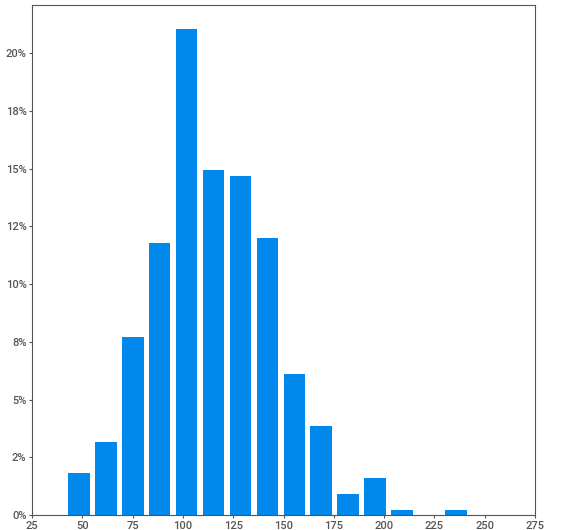
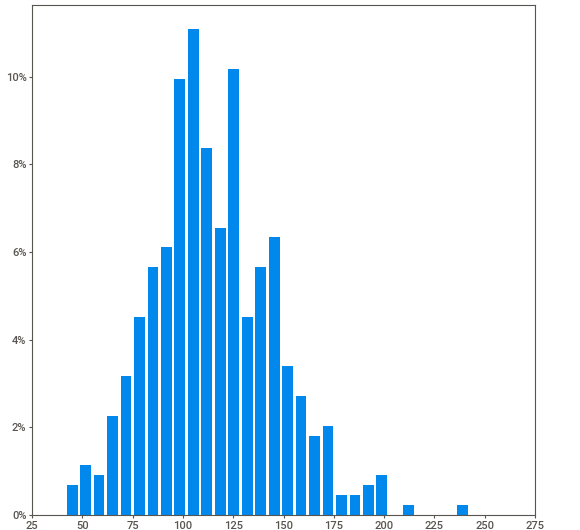
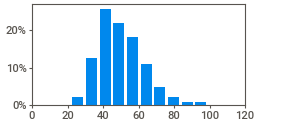
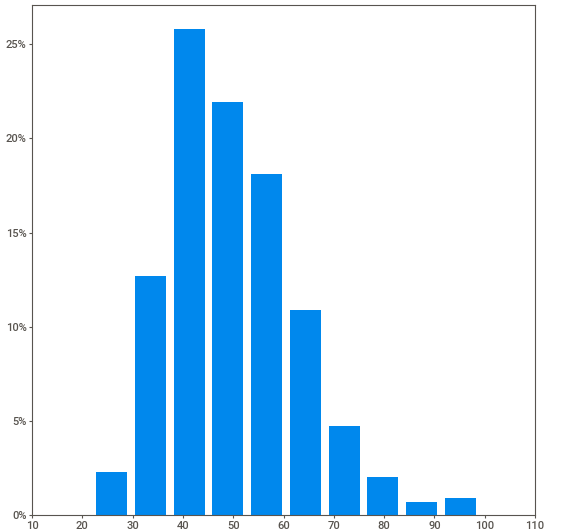
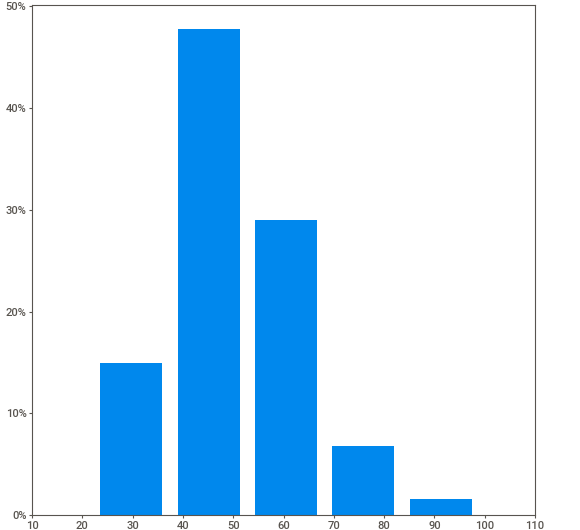
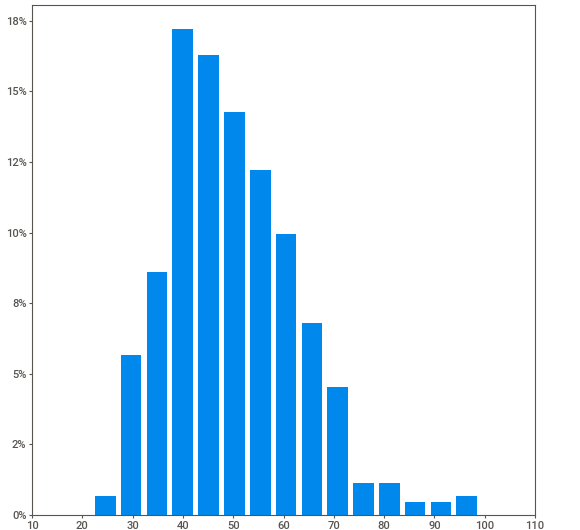
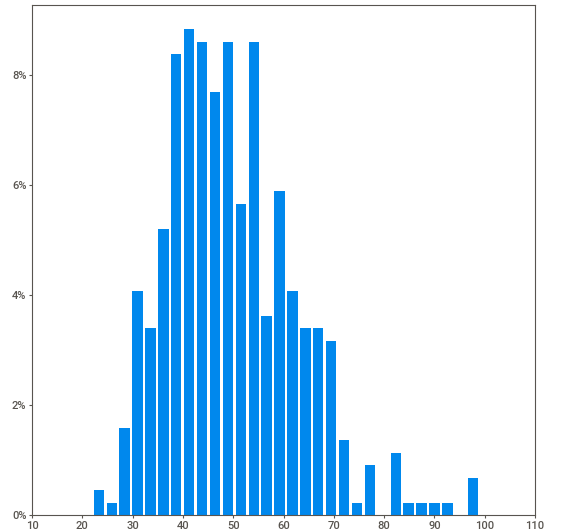
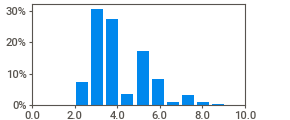
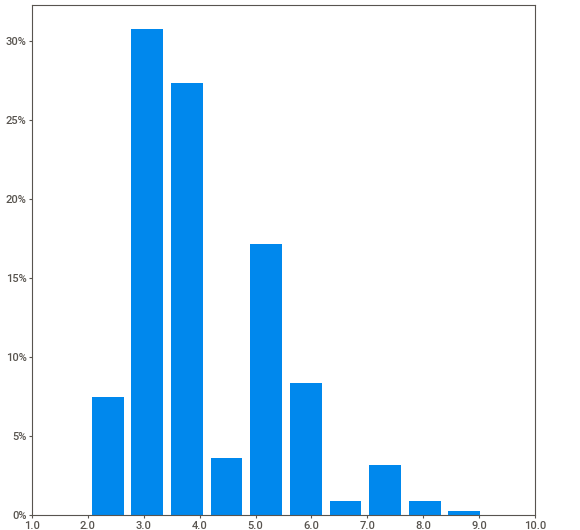
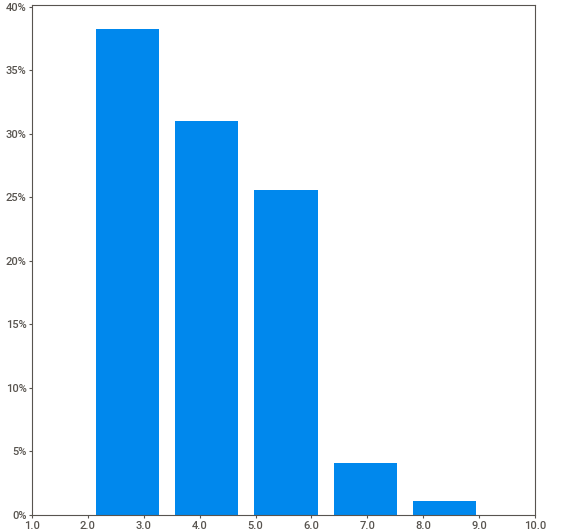
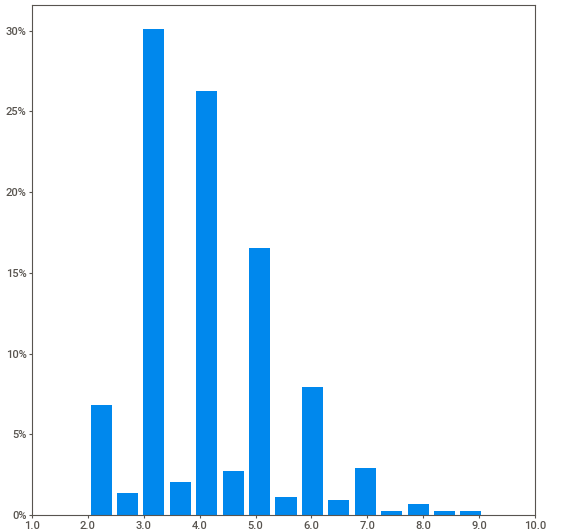
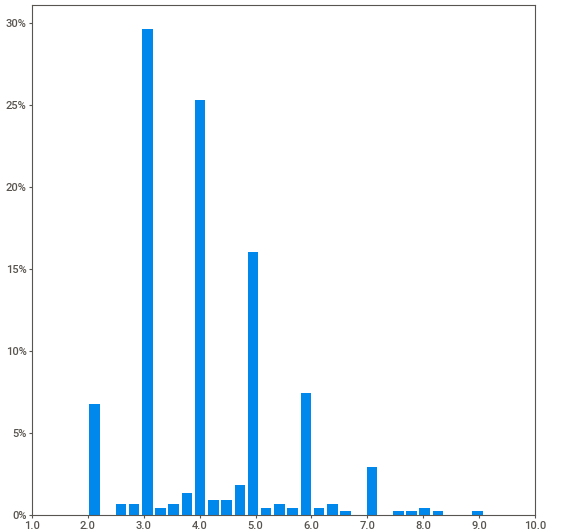
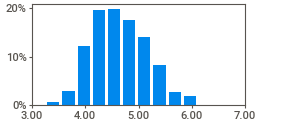
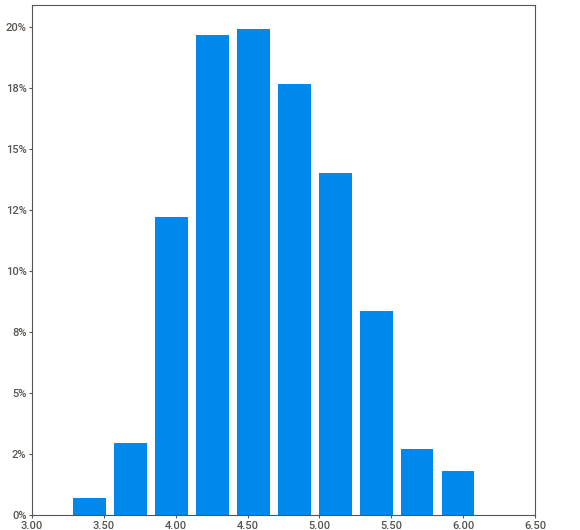
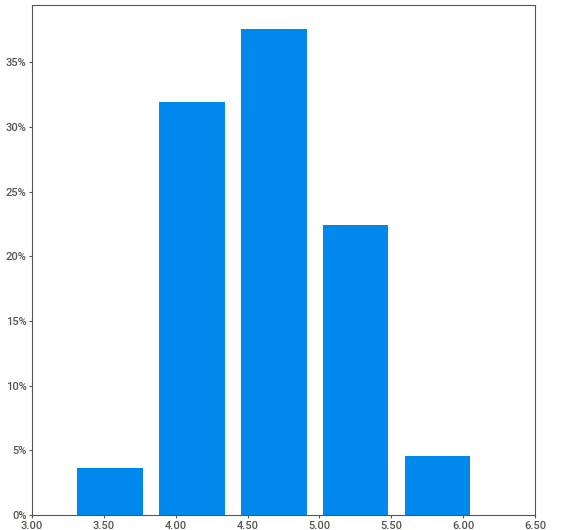
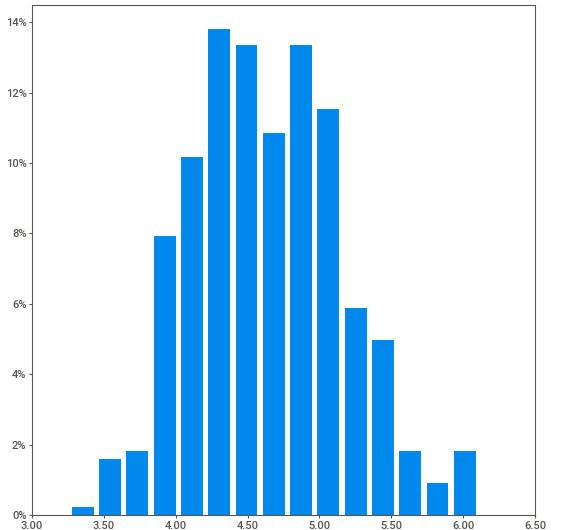
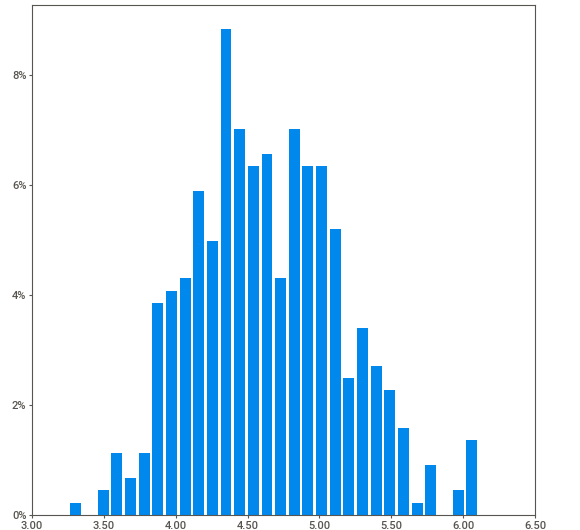
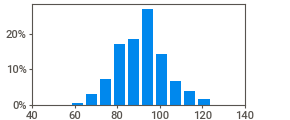
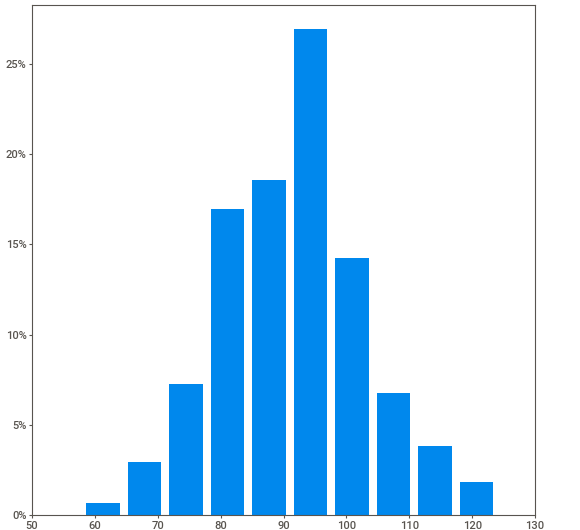
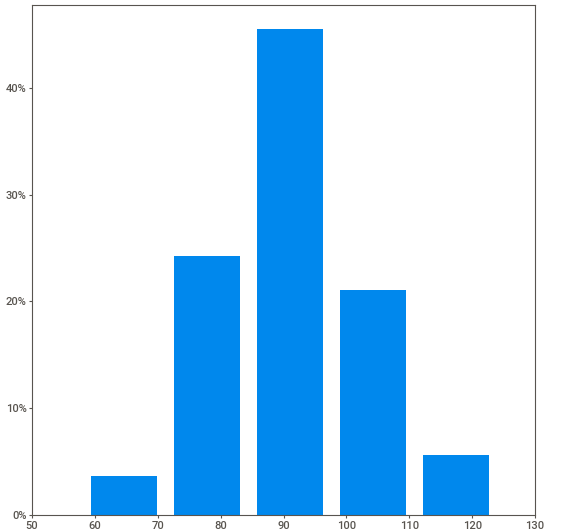
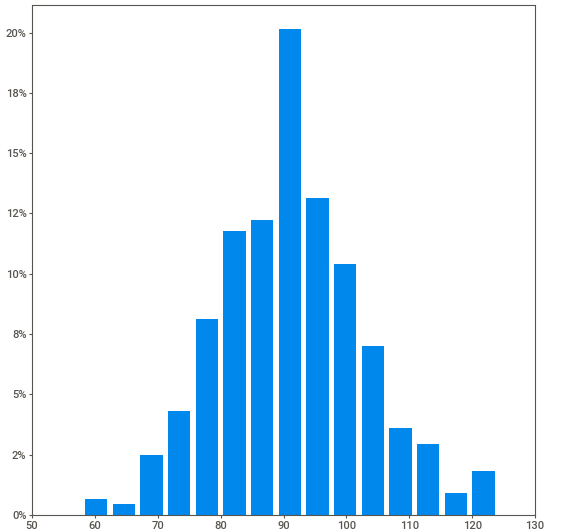
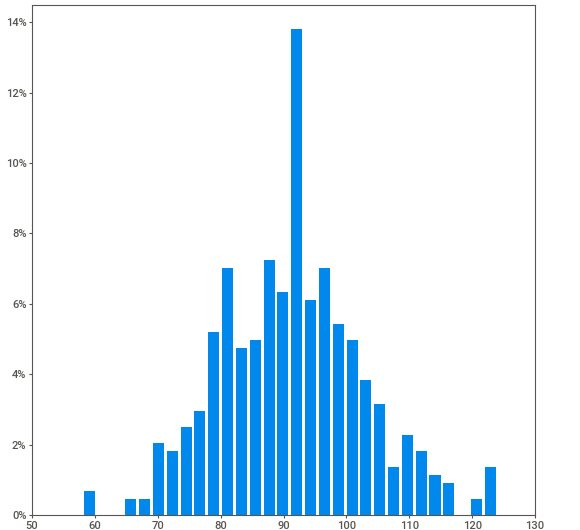
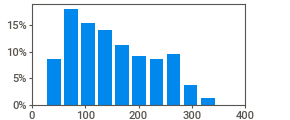
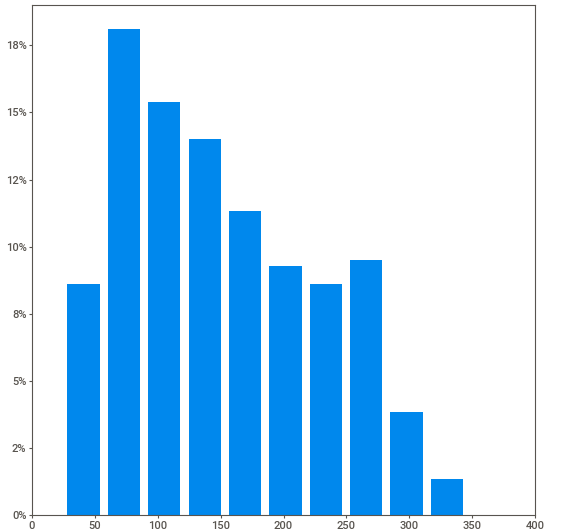
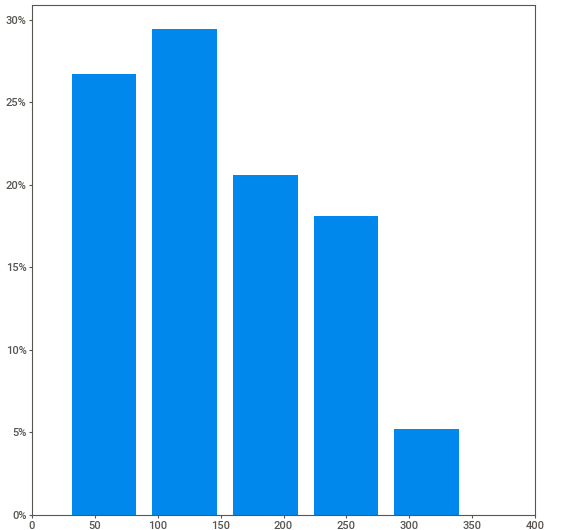
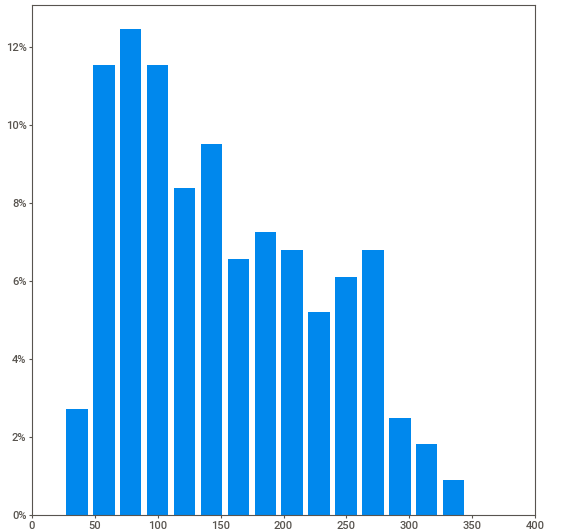
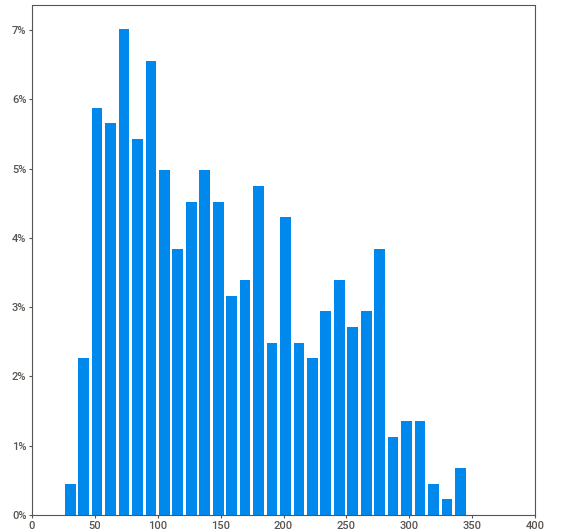
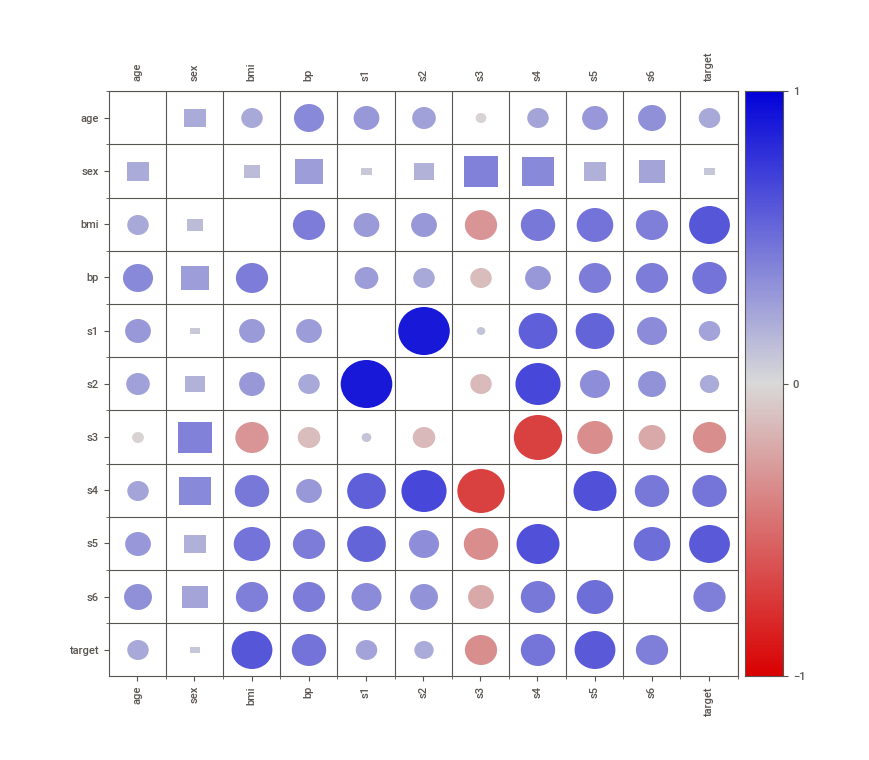
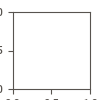

In [ ]:
# Se instala la librería Sweetviz
!pip install Sweetviz

# Se ejecuta getAutomaticStatisticalEDA para obtener un análisis estadístico automático
eda.getAutomaticStatisticalEDA()

**EDA Automático Gráfico**

En este punto se llevará a cobo un eda automático centrado en representar gráficas, para ello se empleará la librería autoviz que permite dibujar los siguientes gráficos de las columnas del dataset:

* Scatter Plot: gráfico de dispersión
* Histogram: histograma
* Box Plot: gráfico de caja
* Probability Plot: gráfico de probabilidad
* Correlation Matrix: matriz de correlación

Mediante %matplotlib inline se habilitará la representación de gráficos con matplotlib y tras ello se inicia el análisis gráfico.

Shape of your Data Set loaded: (442, 11)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  10
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    11 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
To fix these data quality issues in the dataset, import FixDQ from autoviz...
    All variabl

Number of All Scatter Plots = 55


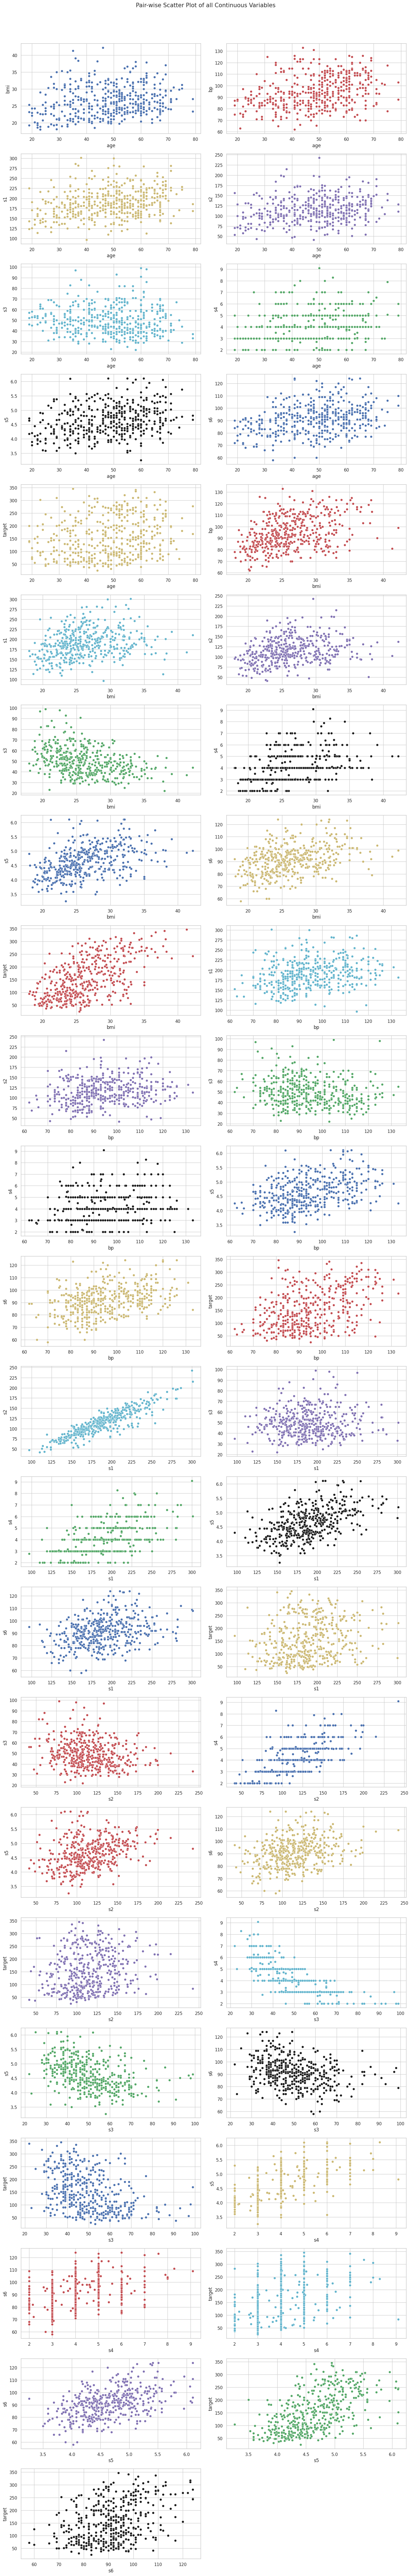

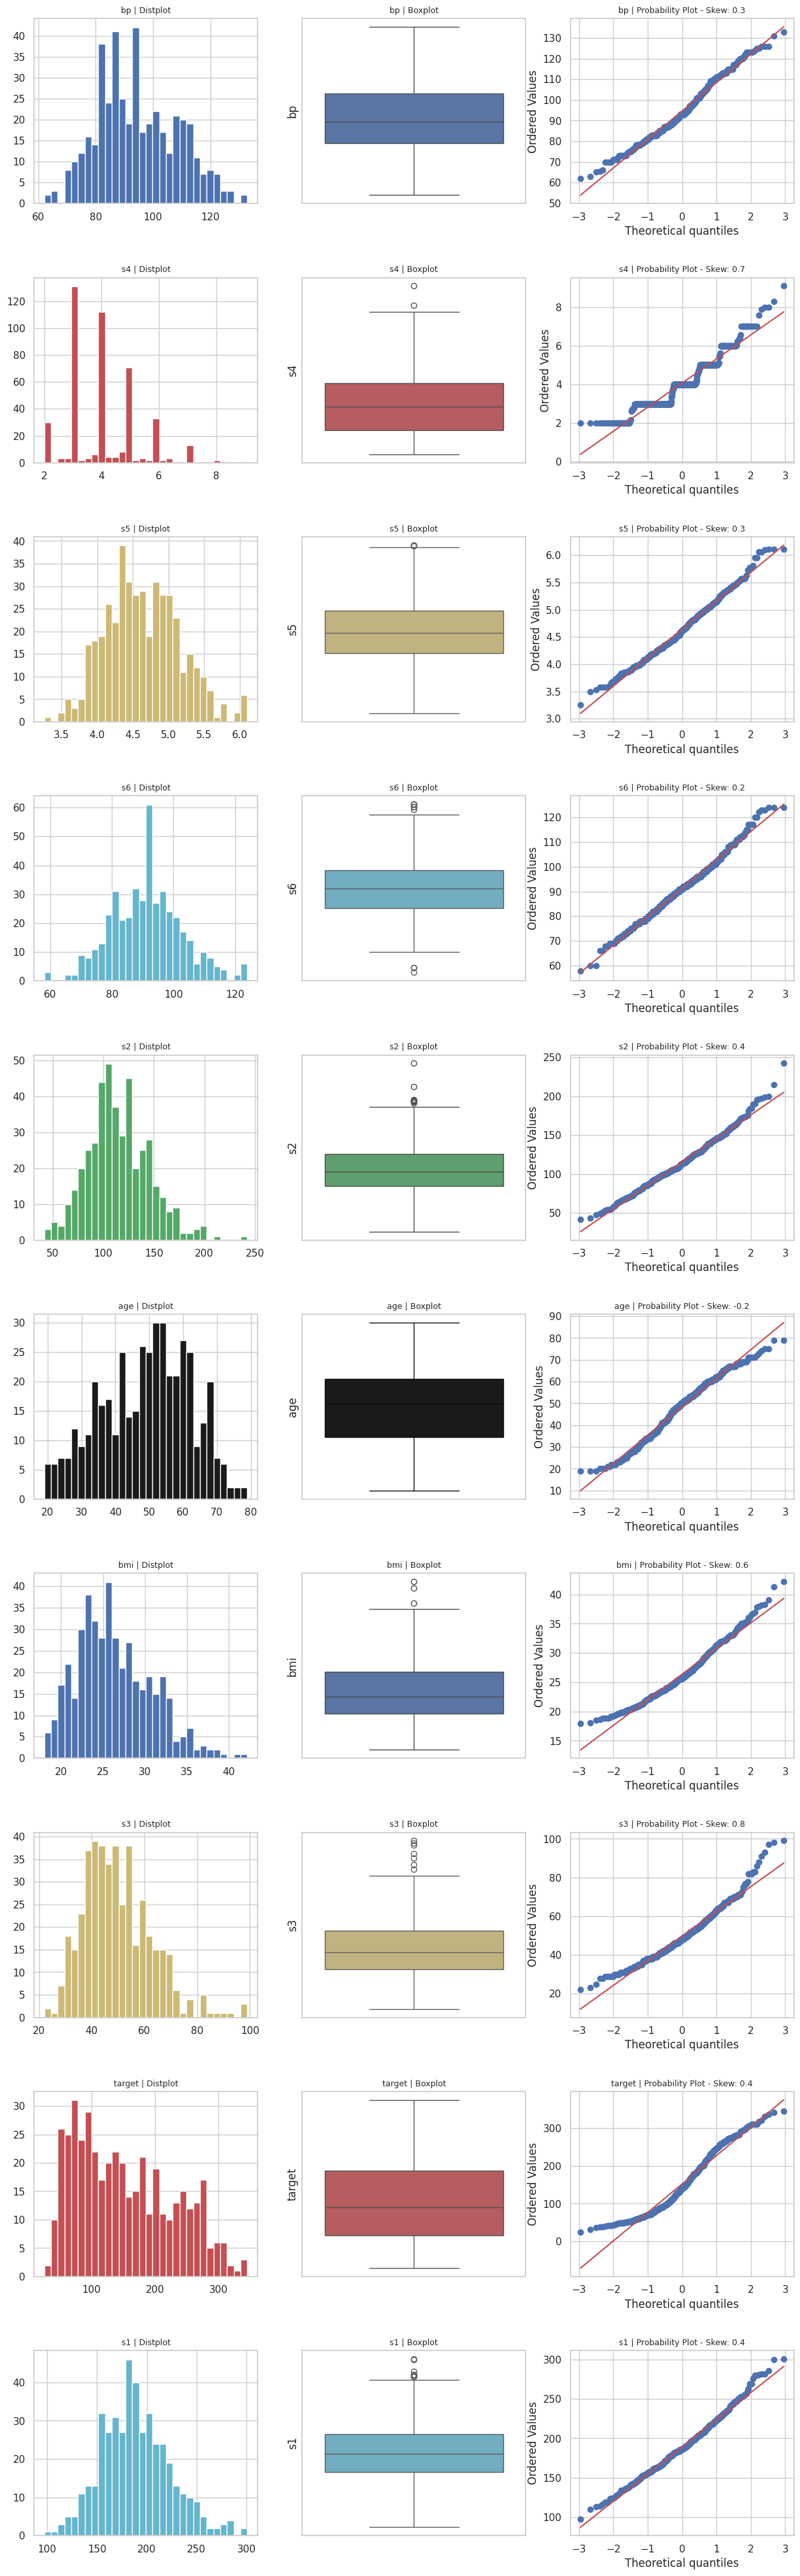

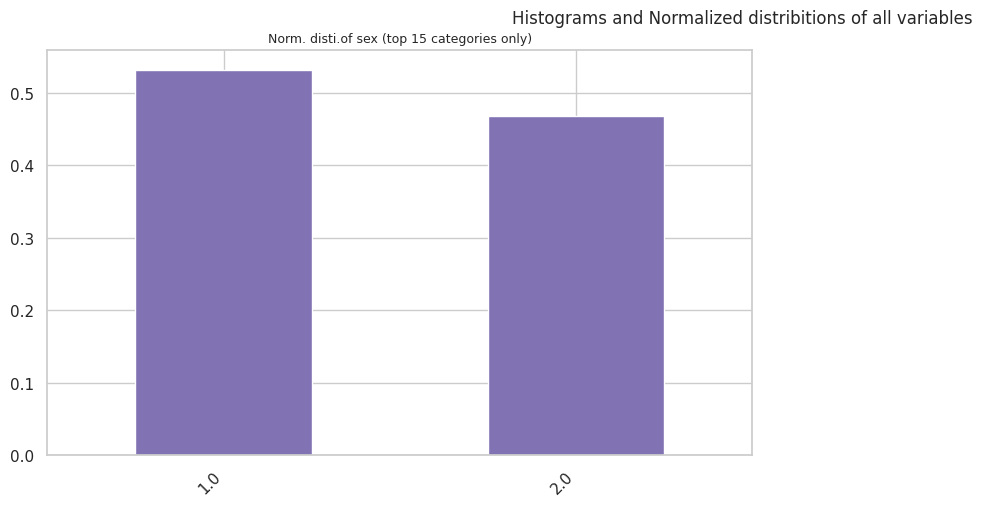

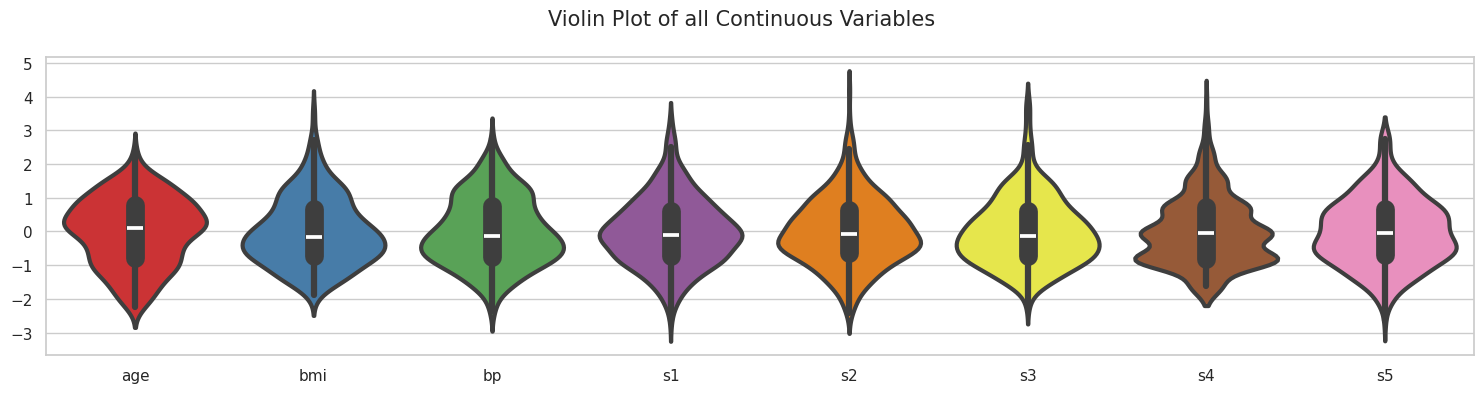

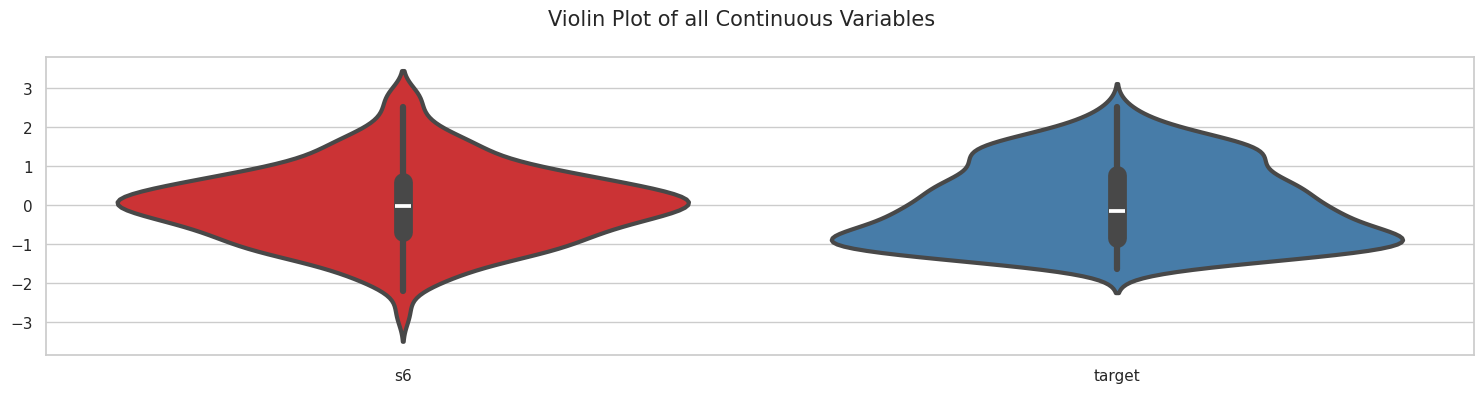

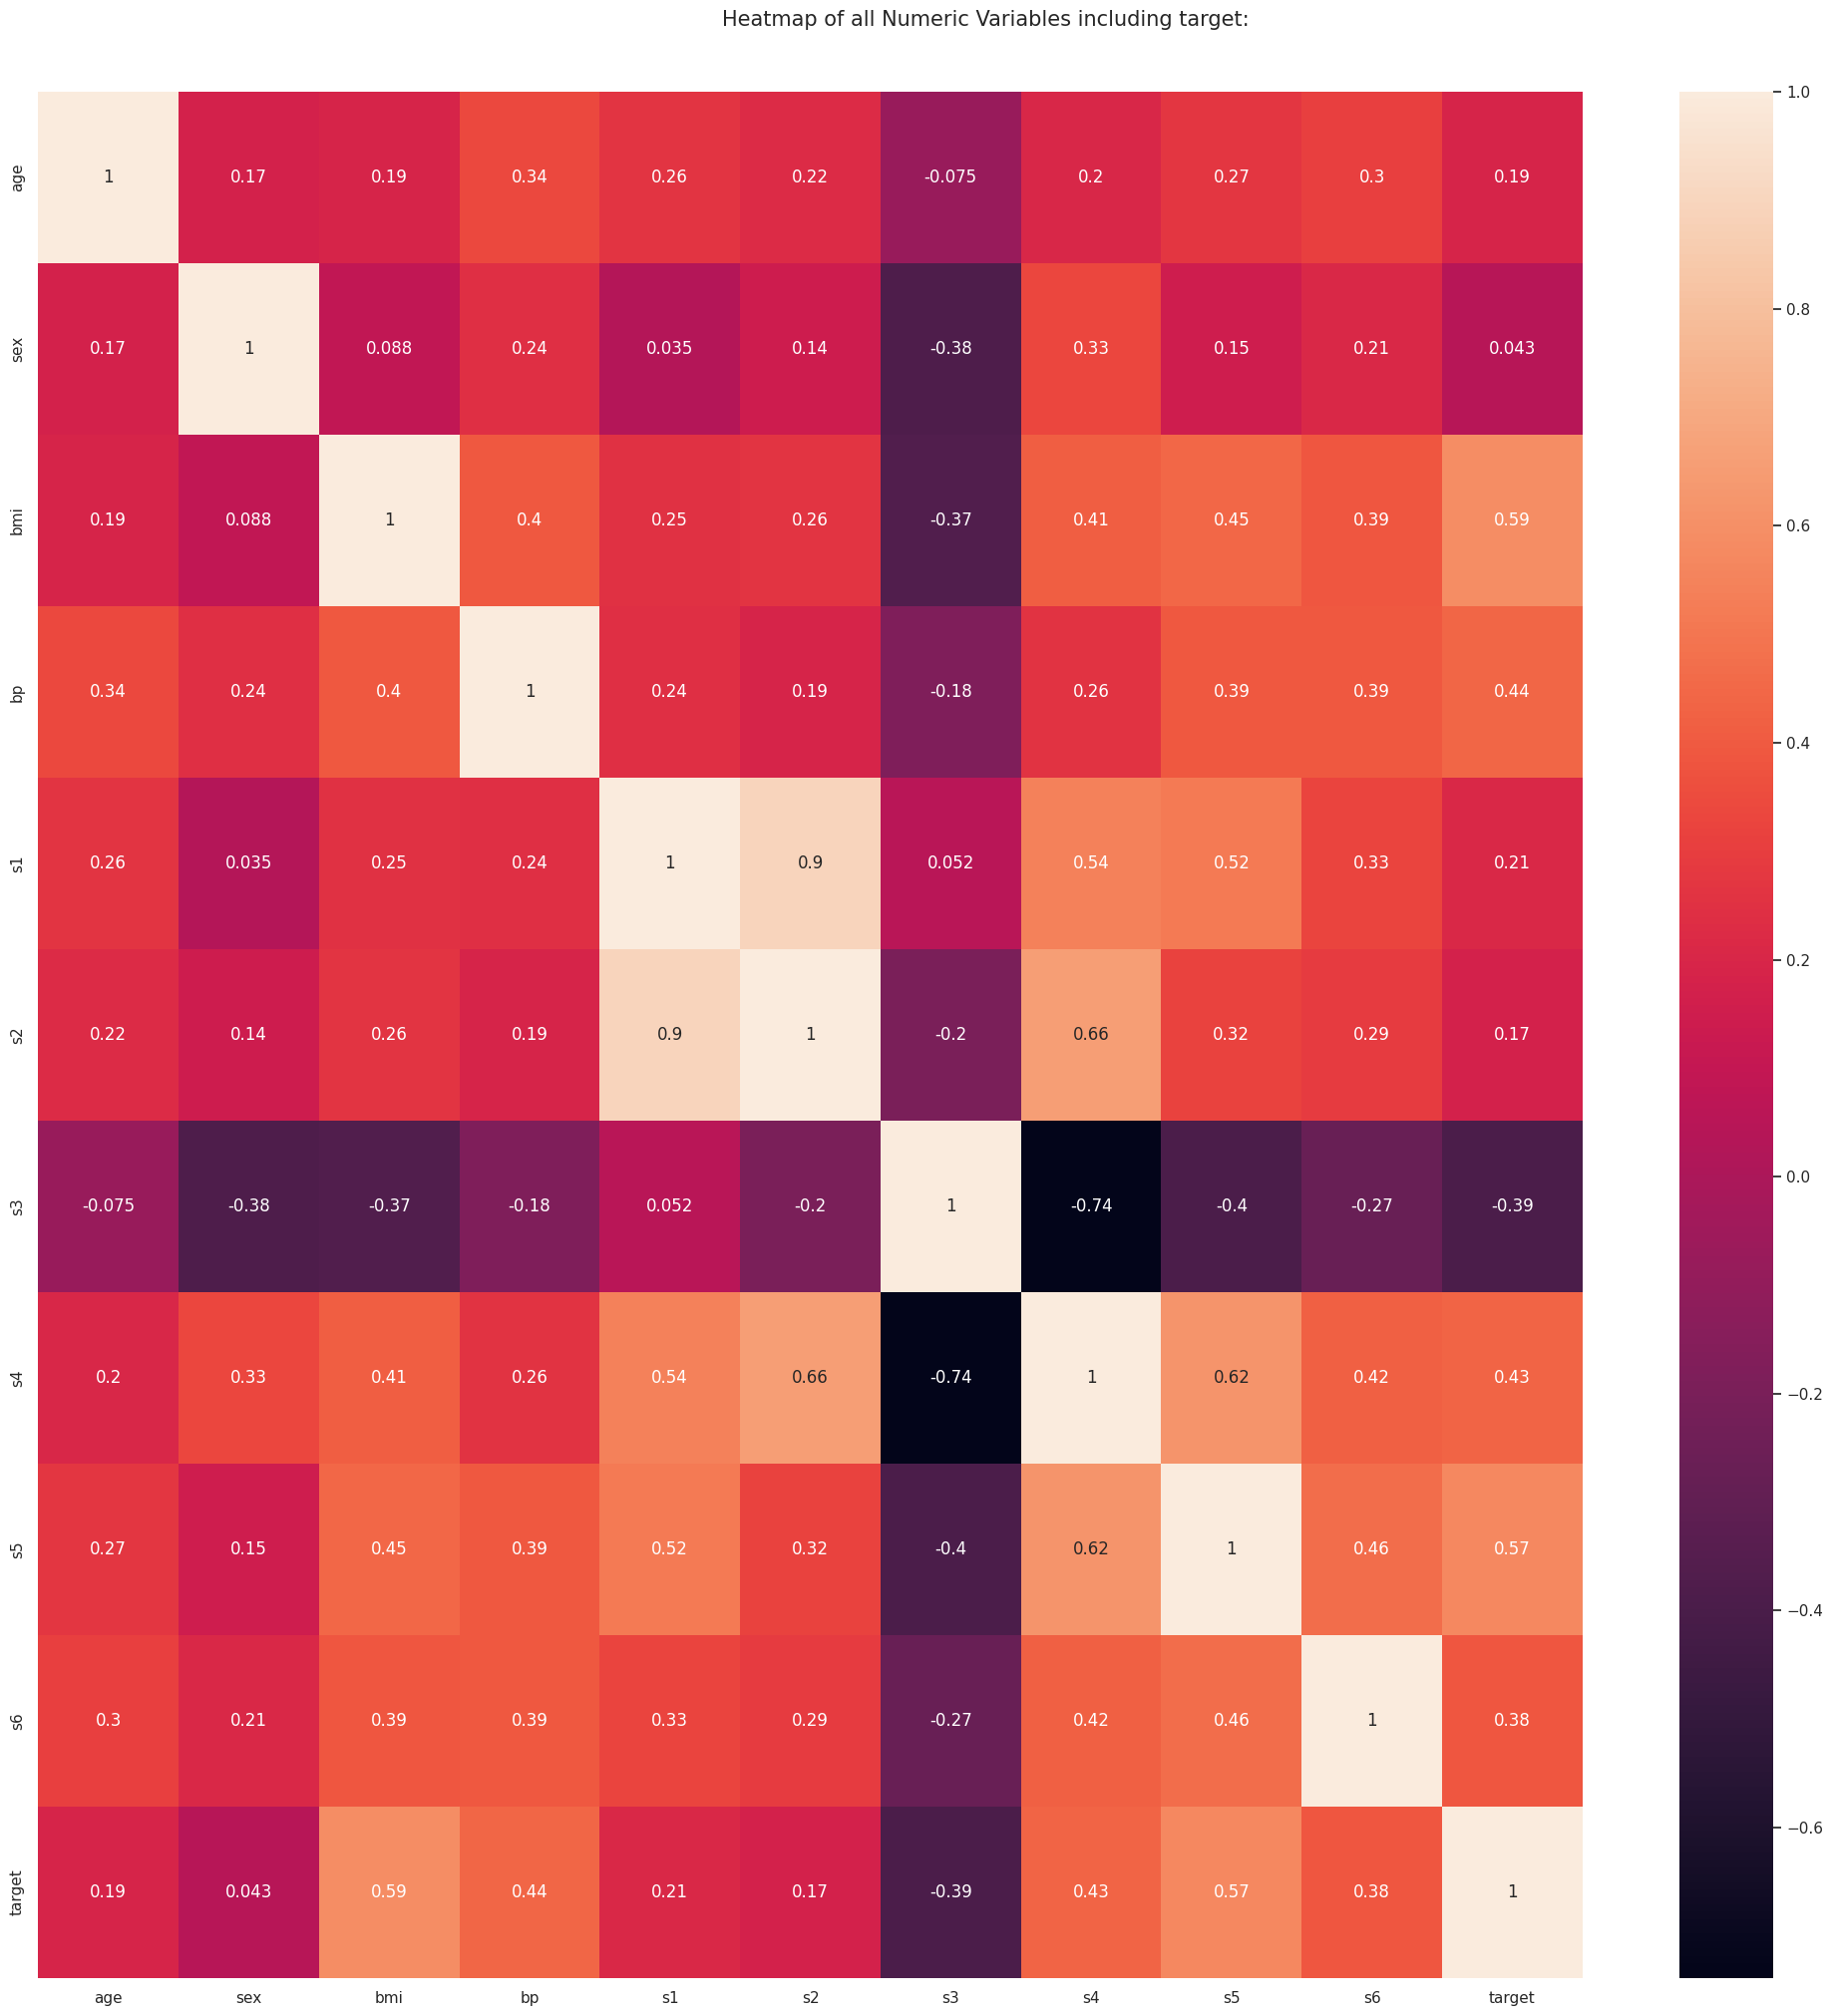

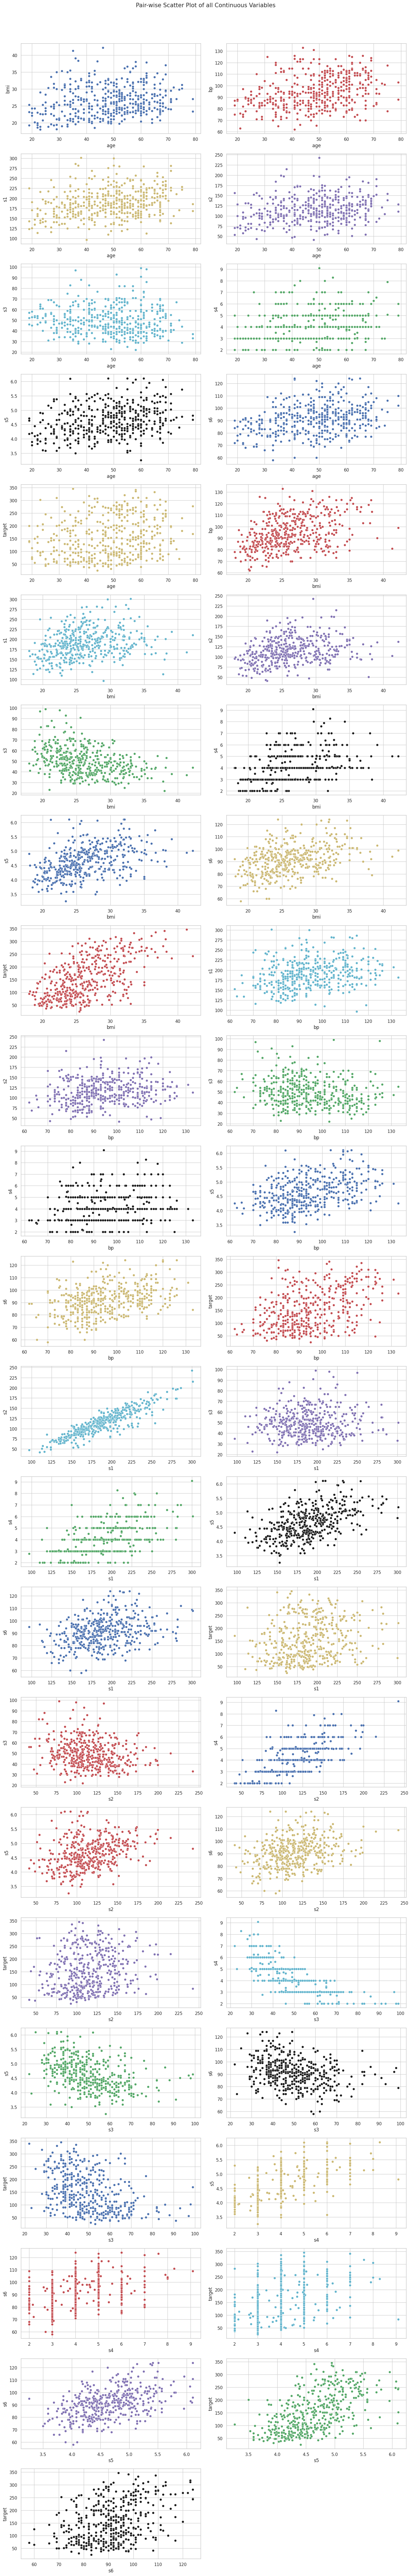

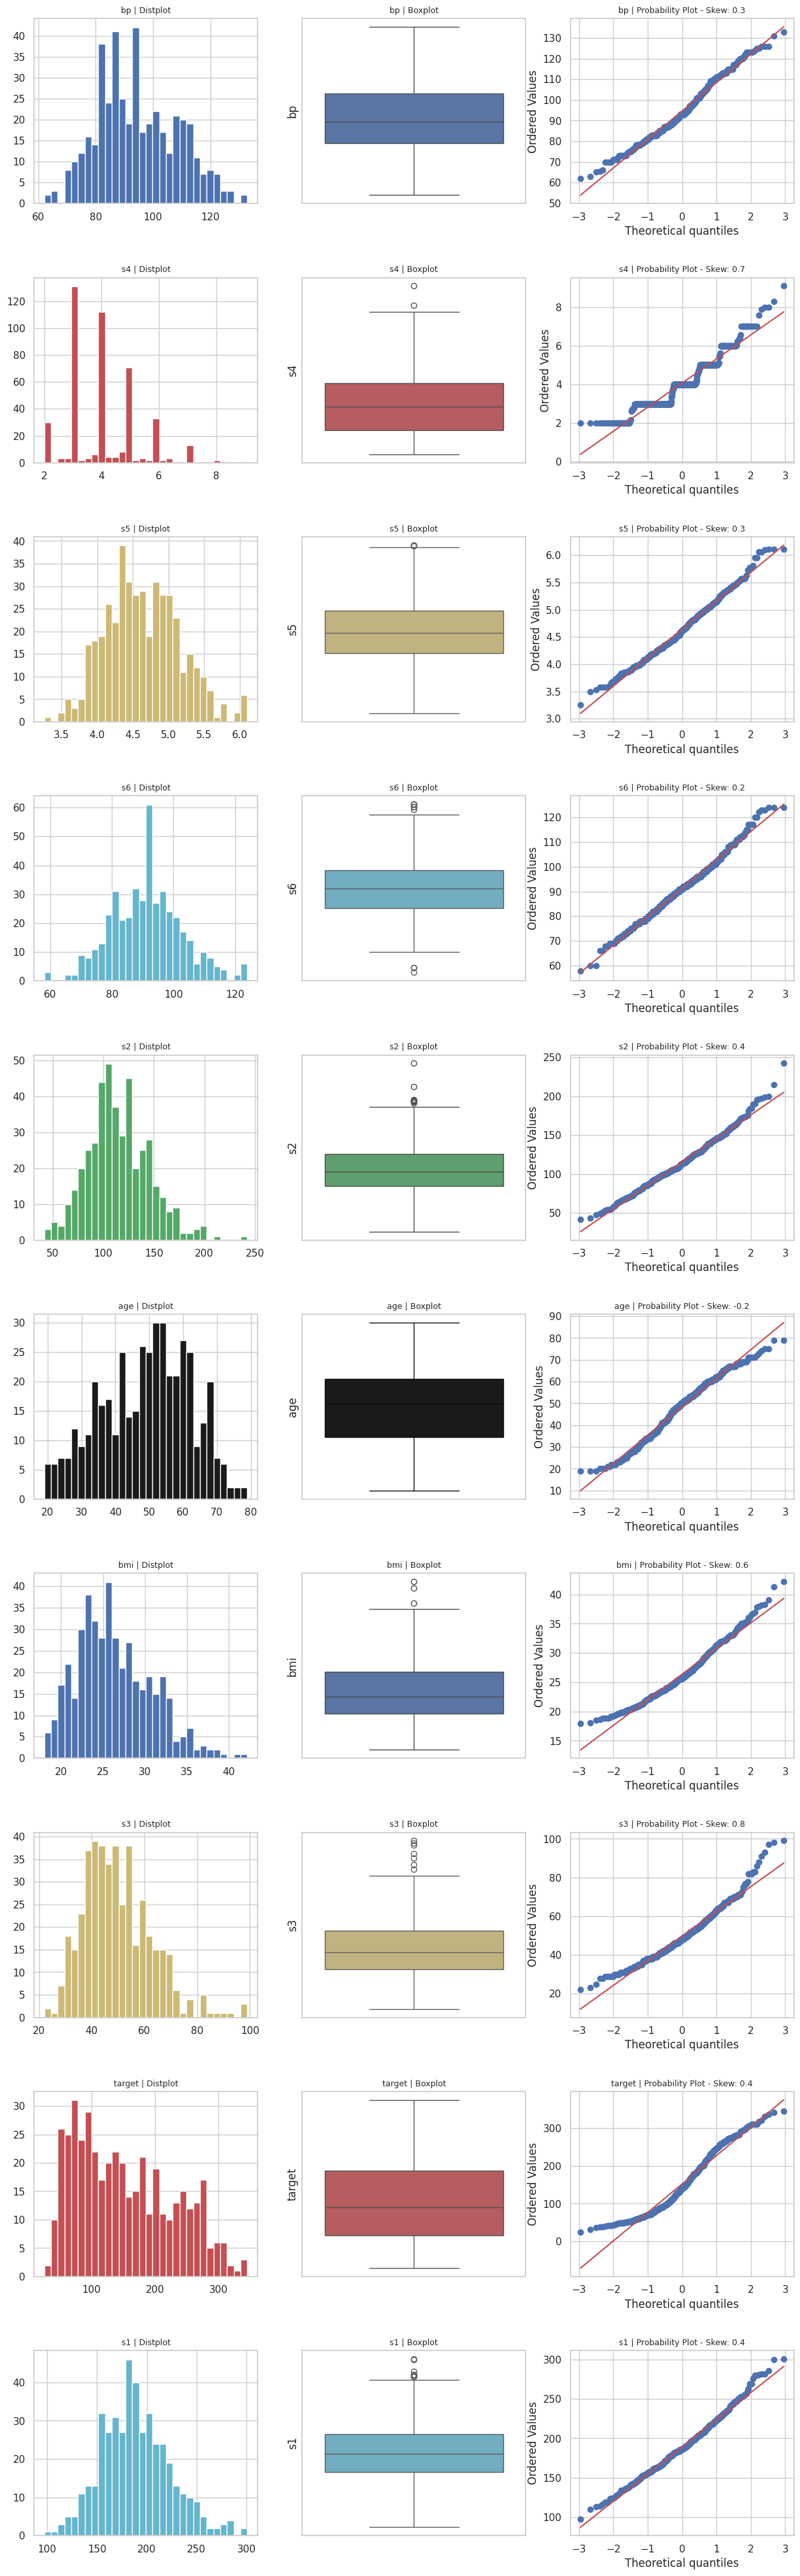

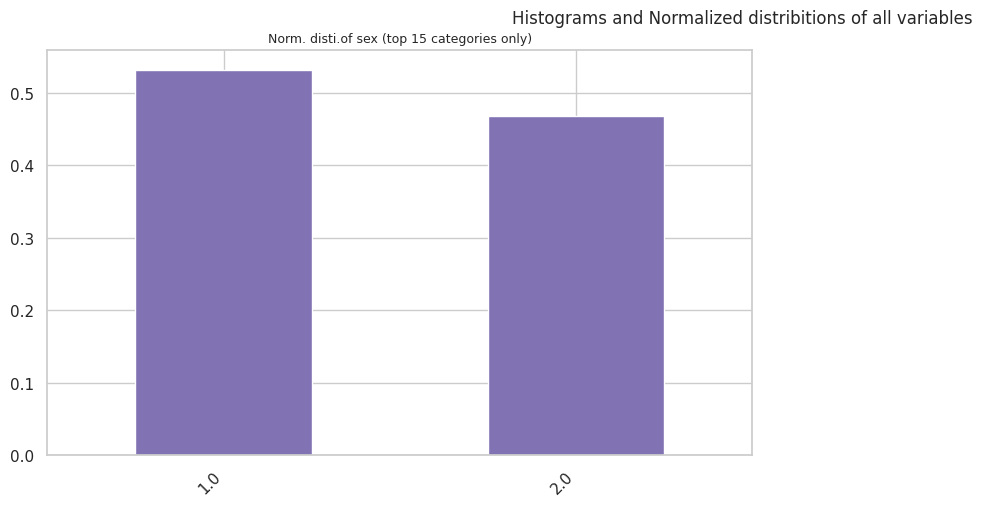

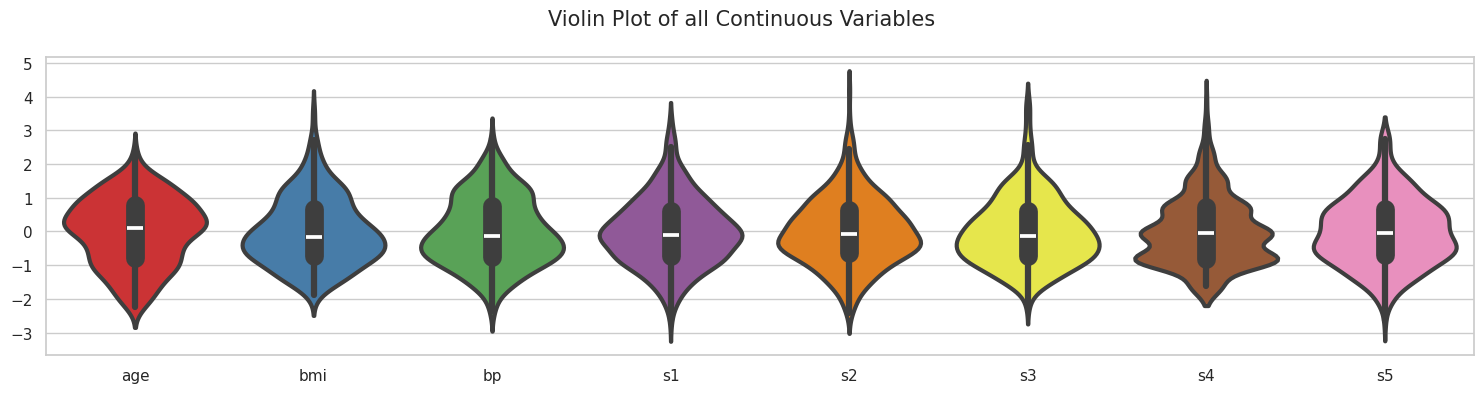

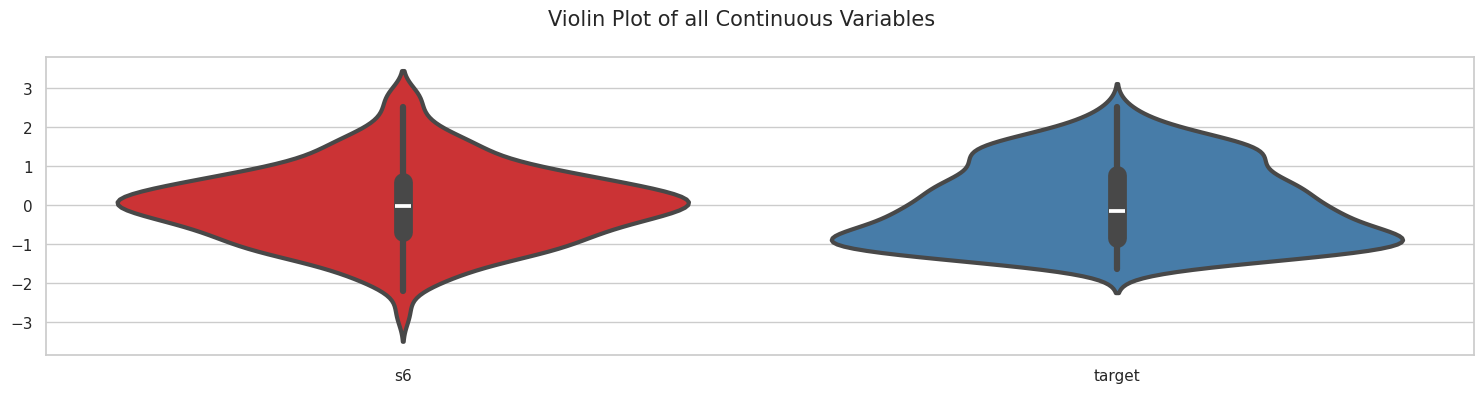

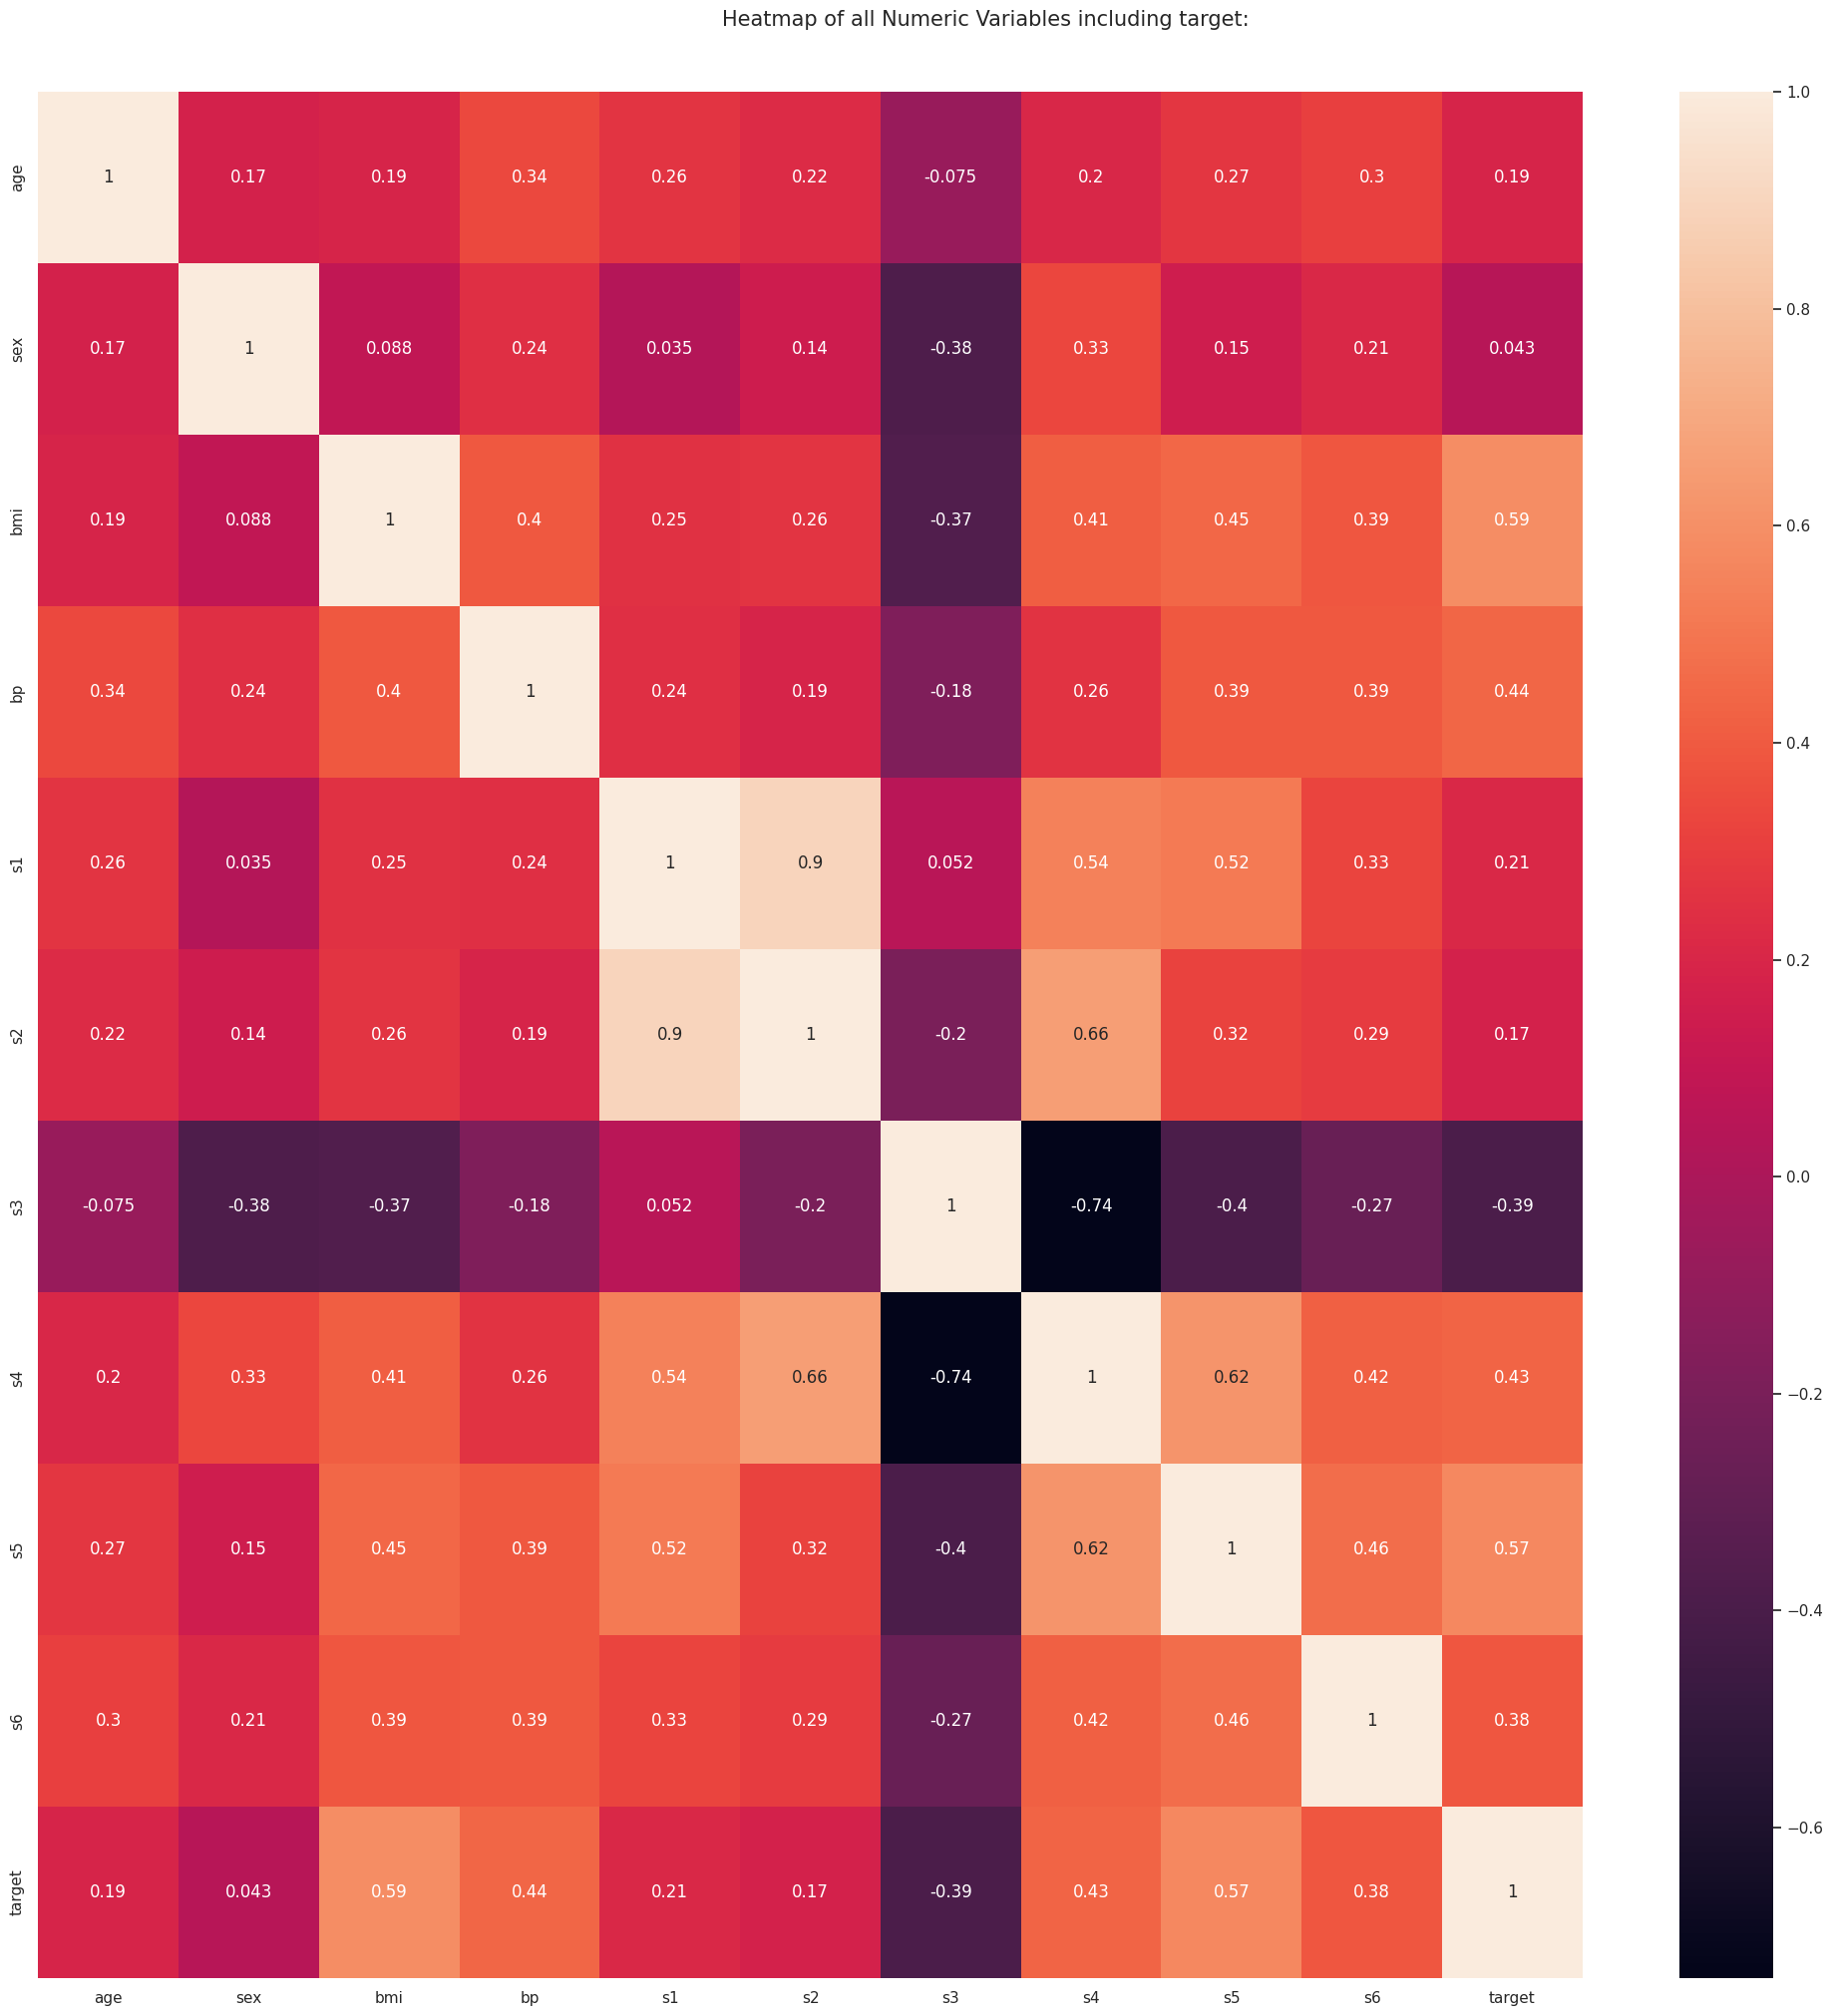

No categorical or numeric vars in data set. Hence no bar charts.
All Plots done
Time to run AutoViz = 51 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [ ]:
# Se habilita el dibujado de gráficos con matplotlib
%matplotlib inline

# Se ejecuta getAutomaticStatisticalEDA para instalar la librería Autiviz y obtener un análisis gráfico automático
eda.getAutomaticGraphicalEDA()

# 5. Entrenamiento y Validación del Modelo

En este apartado se tomarán todas las decisiones necesarias para el entrenamiento y la evaluación del modelo de predicción de la variable target del presente conjunto de datos.

En primer lugar se divide el dataset extrayendo la variable target del resto del dataframe, el cual se considerará como el conjunto de predictores.

El siguiente paso es seleccionar la técnica de cross-validation, para este fin se utilizará KFold y concretamente establecer la división en 5 subconjuntos.

Respecto al pipeline, la decisión tomada fue emplear StandardScaler para la estandarización de las variables numéricas.

La métrica encargada de la evaluación del modelo será el coeficiente de determinación o R², la cual compara la variabilidad en la predicción del modelo respecto a la variabilidad total de la variable independiente. Su rango de valores se encuentra entre [0, 1] y cuanto más cercano a 1 sea mejor rendimiento demuestra el modelo.

En cuanto a la elección del algoritmo para entrenar el modelo, se aplicarán los siguientes algoritmos de regresión para estudiar cual ofrece un mejor rendimiento:

* LinearRegression: técnica que asume una relación lineal entre las variables predictoras y la variable objetivo. El objetivo es encontrar la línea  que minimiza la suma de los cuadrados de las diferencias entre las predicciones del modelo y los valores reales de la variable dependiente.

* Ridge Regression: variante de la regresión lineal que agrega un término de regularización L^2  a la función de pérdida. Esto ayuda a prevenir el sobreajuste del modelo.

* Random Forest Regressor: extensión de los árboles de decisión que construye múltiples árboles y promedia sus predicciones para mejorar el modelo.

Finalmente, se declara la función evaluate que en base a los parámetros recibidos se encargará del entrenamiento y evaluación de módelos, así como de mostrar el resultado la métrica de evaluación.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from typing import Iterable
from sklearn.model_selection import cross_val_score

# Se separa el dataframe en la variable objetivo y el conjunto de predictores
y = data['target']
x = data.drop('target', axis=1)

# Se inicializa KFold para obtener 5 subconjuntos
kf = KFold(n_splits=5)

# Se crea el array de pipelines, cada uno contendrá StandardScaler para la estandarización y un algoritmo de regresión distinto
pipelines = [
    Pipeline([
      ('scaler', StandardScaler()),
      ('lr', LinearRegression())
    ]),
    Pipeline([
      ('scaler', StandardScaler()),
      ('rd', Ridge())
    ]),
    Pipeline([
      ('scaler', StandardScaler()),
      ('rfr', RandomForestRegressor())
    ])
]

# Se declara la función para realizar el entrenamiento y evaluación de modelos
def evaluate(pipeline: Pipeline, x: pd.DataFrame, y: pd.Series, scoring: str = 'r2', cv: int or KFold or Iterable = 5) -> None:
    """
    Evalúa un modelo utilizando validación cruzada y muestra los resultados.

    Parámetros:
    - pipeline (Pipeline): El modelo o pipeline a evaluar.
    - x (pd.DataFrame): Las características del conjunto de datos.
    - y (pd.Series): Las etiquetas del conjunto de datos.
    - scoring (str): La métrica de evaluación. Por defecto, 'r2'.
    - cv (int or KFold or iterable): Estrategia de validación cruzada. Por defecto, 5 divisiones.
    """
    cv_scores = cross_val_score(pipeline, x, y, scoring=scoring, cv=cv)
    print("CV Scores", cv_scores)
    print("Average CV Score", cv_scores.mean())

# Se evalua el pipeline, con la métrica r2 y utilizando la técnica de cross-validation seleccionada
print("1. Linear Regression: ")
evaluate(pipelines[0], x, y, scoring='r2', cv=kf)

print("\n2. Ridge Regression: ")
evaluate(pipelines[1], x, y, scoring='r2', cv=kf)

print("\n3. Random Forest Regressor: ")
evaluate(pipelines[2], x, y, scoring='r2', cv=kf)

1. Linear Regression: 
CV Scores [0.42955615 0.52259939 0.48268054 0.42649776 0.55024834]
Average CV Score 0.48231643590864215

2. Ridge Regression: 
CV Scores [0.42797491 0.52163026 0.48561422 0.42719156 0.54855718]
Average CV Score 0.4821936251213236

3. Random Forest Regressor: 
CV Scores [0.3739176  0.48641002 0.45517416 0.37694436 0.43013181]
Average CV Score 0.4245155907707197


Linear Regression ha sido el algoritmo con mejores métricas entre todos los que se han probado, lo cual puede encontrar su explicación en que se trata de un algoritmo enfocado en la identificación de relaciones lineales y entre las variables biológicas suelen darse este tipo de relaciones, por ejemplo: un alto nivel de colesterol ldl es riesgo de problemas coronarios, mientras que valores bajos de hdl pueden implicar enfermedades autoinmunes.

Debido al carácter lineal de los parámetros biológicos no es de extrañar que Linear Regression y en segundo lugar, Ridge Regression (también especializado en captar relaciones lineales) sean quienes hayan obtenido mejores resultados.

